<a href="https://colab.research.google.com/github/npuneeth/York_Big_Data/blob/main/popularity_of_news_stories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDICTING POPULARITY OF NEWS STORIES**



### *CSDA 1110 - Winter 2022*

**Presented by:**


*   David Aguirrez-Fuertes
*   Puneeth Nagarajaiah
*   Charles Cao
*   Javiera Zamorano Rubio
*   Zeke Guerrero



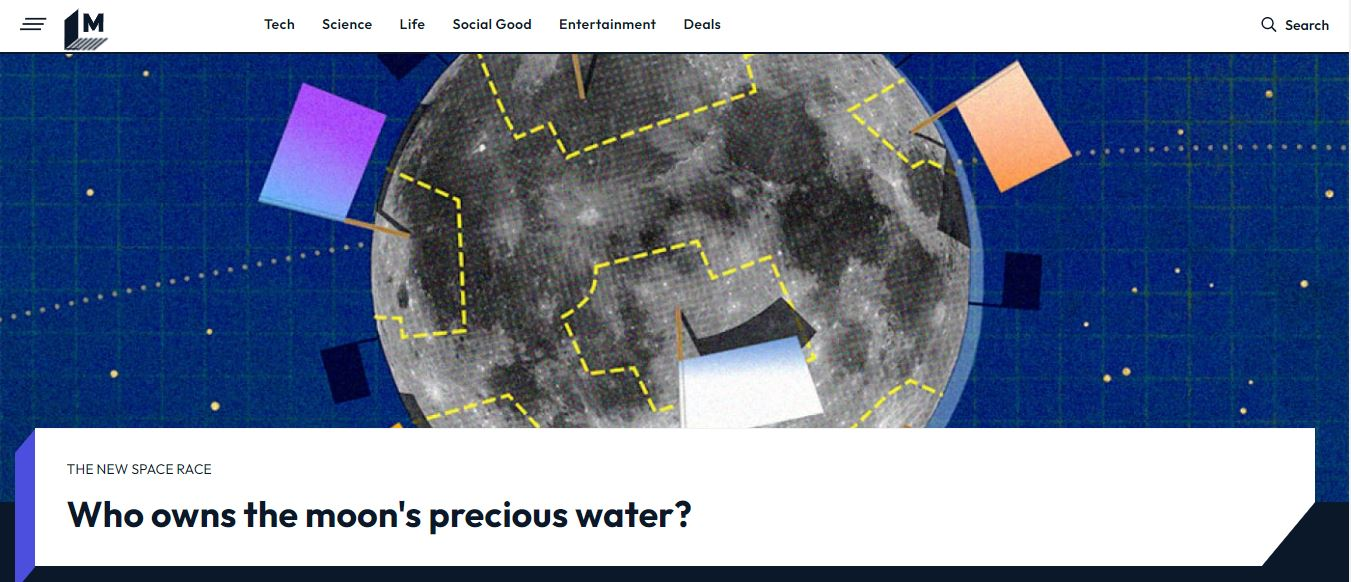

## **1. BUSINESS OBJECTIVE**

● **Background:** 

Mashable is an international entertainment, culture, tech, science and social good digital media platform, news website and multi-platform media and entertainment company.

● **Goal:**

○ Predict the number of shares for each story published on Mashable.com.

○ Understand what attributes of a story have significant predictive power

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score)
from sklearn.metrics import roc_auc_score
from statsmodels.formula.api import logit

# allow plots to appear directly in the notebook
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install pycaret

In [ ]:
df_path = '/content/Dataframe/OnlineNewsPopularity.csv'  #change dir to your project folder
df = pd.read_csv(df_path)
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

## **2. Data Pre-processing and exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

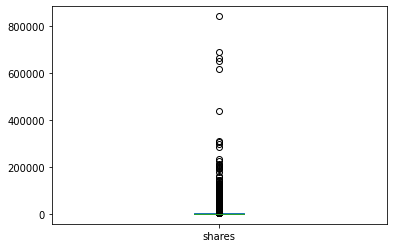

In [ ]:
df['shares'].plot.box()
# Boxplot for 'shares'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff31c8ae890>]],
      dtype=object)

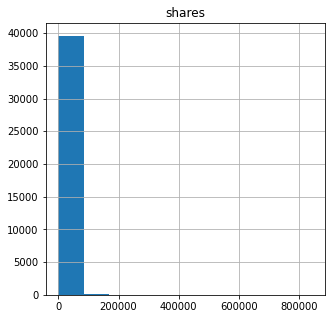

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
df[['shares']].hist()
# Histogram plot for output variable shows a highly skewed distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


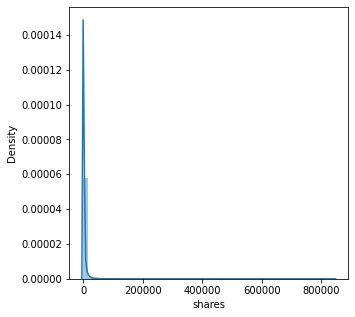

<Figure size 360x360 with 0 Axes>

In [ ]:
sns.distplot(df['shares'])
fig=plt.figure()

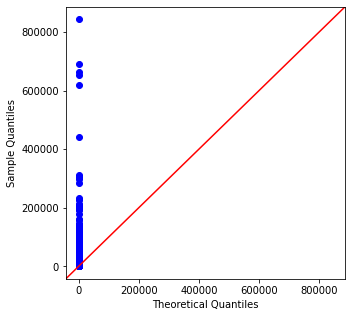

In [ ]:
import pylab as py
sm2.qqplot(df[['shares']], line ='45')
py.show()
# q-q plot shows how skewed the predictor variable is 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


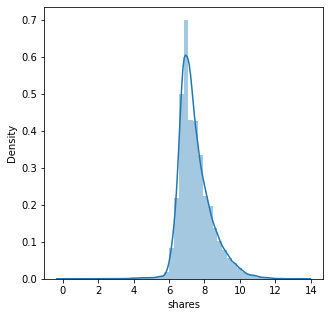

<Figure size 360x360 with 0 Axes>

In [ ]:
df_log_shares=np.log(df['shares'])
sns.distplot(df_log_shares)
fig=plt.figure()
# let us log normalize the predictor variable and check q-q plot

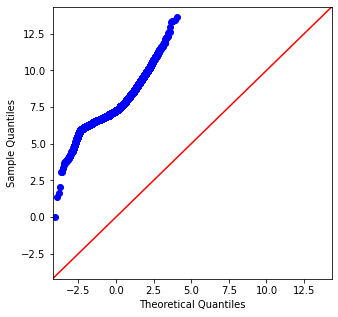

In [ ]:
sm2.qqplot(df_log_shares, line ='45')
py.show()

#### Log normalized q-q plot is still not satisfactory

In [ ]:
df_story=df[['url','shares']]
df_story.head()
#Create new dataframe of 'url' and 'shares' to understand which are the outlier data points

url  shares
0  http://mashable.com/2013/01/07/amazon-instant-...     593
1  http://mashable.com/2013/01/07/ap-samsung-spon...     711
2  http://mashable.com/2013/01/07/apple-40-billio...    1500
3  http://mashable.com/2013/01/07/astronaut-notre...    1200
4   http://mashable.com/2013/01/07/att-u-verse-apps/     505

In [ ]:
df_story.sort_values('shares', ascending=False).nlargest(20, 'shares')
# sort the dataframe by 'shares' in descending order. Find the top 20

url  shares
9365     http://mashable.com/2013/07/03/low-cost-iphone/  843300
5370   http://mashable.com/2013/04/15/dove-ad-beauty-...  690400
23237  http://mashable.com/2014/04/09/first-100-gilt-...  663600
16268  http://mashable.com/2013/11/18/kanye-west-harv...  652900
3145   http://mashable.com/2013/03/02/wealth-inequality/  617900
16009  http://mashable.com/2013/11/12/roomba-880-review/  441000
18788  http://mashable.com/2014/01/14/australia-heatw...  310800
4506   http://mashable.com/2013/03/28/blackberry-1-mi...  306100
16113   http://mashable.com/2013/11/14/ibm-watson-brief/  298400
35256  http://mashable.com/2014/10/22/ebola-cdc-activ...  284700
14757  http://mashable.com/2013/10/18/childhood-mashups/  233400
3043   http://mashable.com/2013/02/28/myspace-tom-twi...  227300
37590        http://mashable.com/2014/11/24/email-myths/  211600
9853   http://mashable.com/2013/07/12/sprint-unlimite...  210300
18488  http://mashable.com/2014/01/07/obama-nsa-refor...  208300
17020  http://mashable.com/2013/12/04/snl-paul-rudd-o...  205600
37873  http://mashable.com/2014/11/28/ray-rice-gets-a...  200100
18037  http://mashable.com/2013/12/25/xbox-one-gettin...  197600
9575   http://mashable.com/2013/07/08/supercut-one-ma...  196700
18055  http://mashable.com/2013/12/26/mcdonalds-kills...  193400

#### We do not want to remove the outlier as it is significant for our analysis. Since parametric testing is not suitable for highly-skewed data, we will consider non-parametric tests.

In [ ]:
df.drop(df.columns[[0,1]], axis = 1, inplace = True)
# drop 'url' and 'time_delta'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


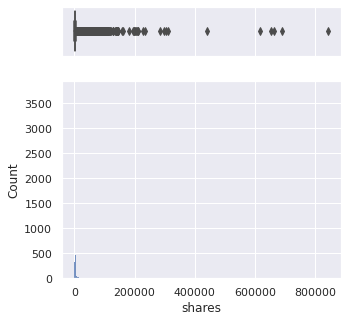

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.10, .40)})
 
# assigning a graph to each ax
sns.boxplot(df['shares'], ax=ax_box)
sns.histplot(data=df, x='shares', ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

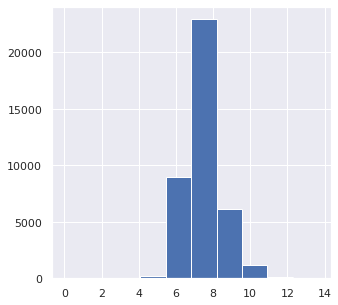

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
df_log_shares.hist()
# print normalized plot of 'shares'

#### Trying out histograms first

Text(0, 0.5, 'Count')

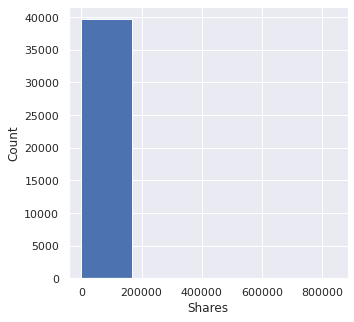

In [ ]:
plt.hist(df.shares, bins=5)
plt.xlabel('Shares')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

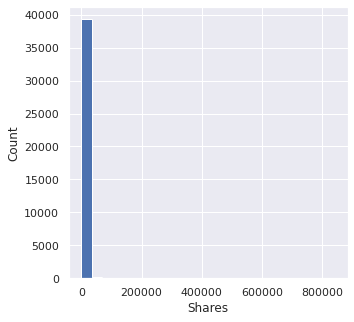

In [ ]:
plt.hist(df.shares, bins=25)
plt.xlabel('Shares')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

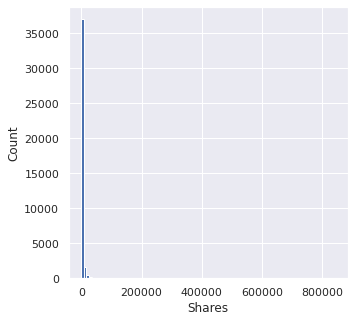

In [ ]:
plt.hist(df.shares, bins=100)
plt.xlabel('Shares')
plt.ylabel('Count')

### Let us use Empirical Cumulative Distribution Function to better understand the spread of the data 

In [ ]:
# Creating our ecdf function
def ecdf(data_ecdf):
    """ 
    This function creates the x and y axis for a ecdf
    plot given the data as input.
    """
    xaxis = np.sort(data_ecdf)
    yaxis = np.arange(1,len(data_ecdf)+1)/len(data_ecdf)
    return xaxis, yaxis

In [ ]:
# Creating the xaxis and yaxis for our ecdf on price
x,y = ecdf(df['shares'])

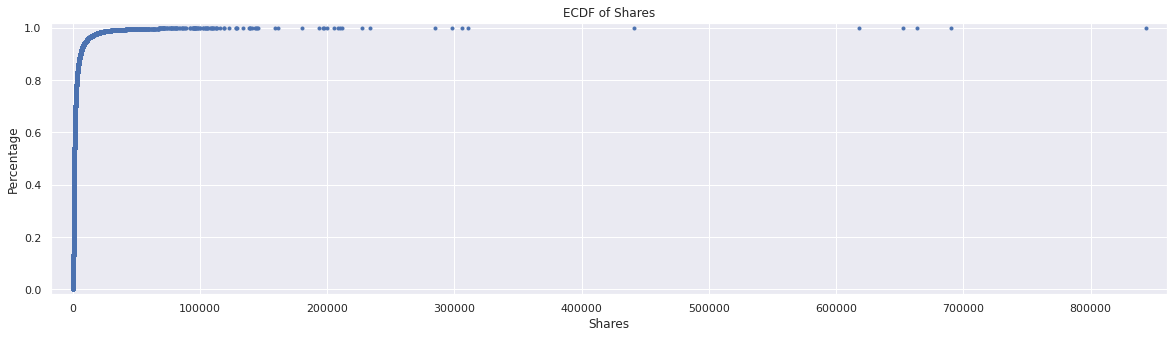

In [ ]:
# Plotting our ecdf
plt.figure(figsize=(20,5))
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Shares')
plt.xlabel('Shares')
plt.ylabel('Percentage')
plt.margins(0.02)
plt.show()

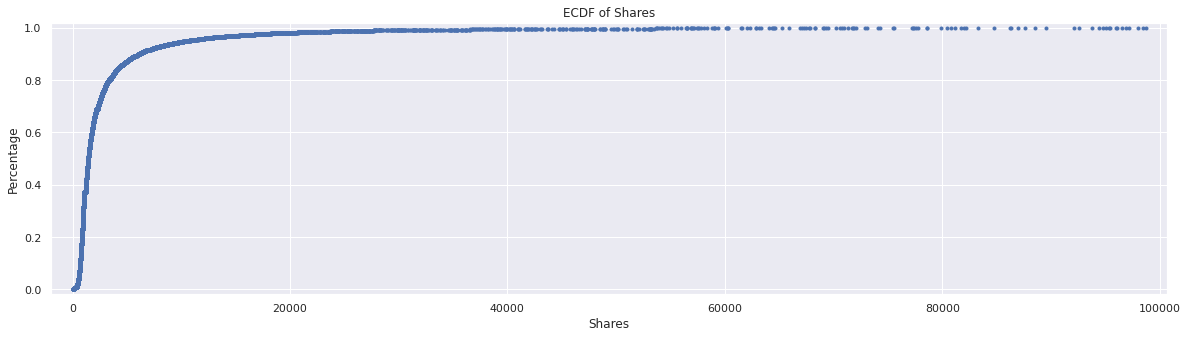

In [ ]:
df_news_1lakh=df[df.shares<100000]

x,y = ecdf(df_news_1lakh.shares)
plt.figure(figsize=(20,5))
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Shares')
plt.xlabel('Shares')
plt.ylabel('Percentage')
plt.margins(0.02)
plt.show()
# filter shares less than 100000

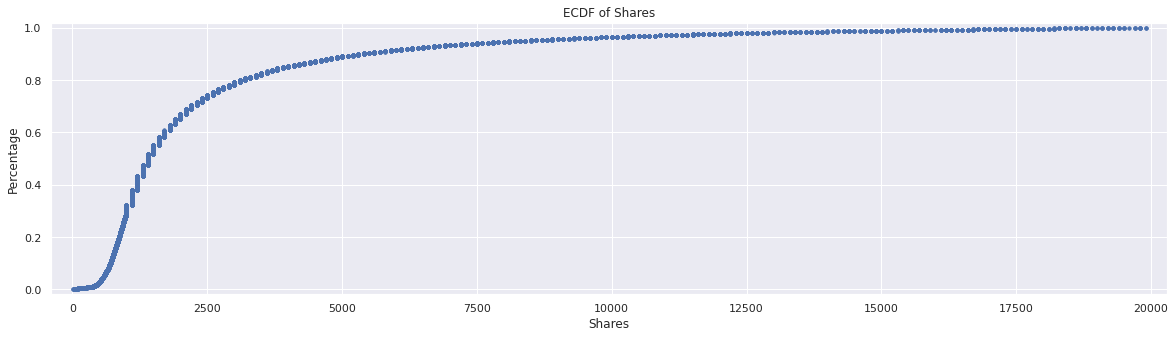

In [ ]:
df_news_20k=df[df.shares<20000]

x,y = ecdf(df_news_20k.shares)
plt.figure(figsize=(20,5))
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Shares')
plt.xlabel('Shares')
plt.ylabel('Percentage')
plt.margins(0.02)
plt.show()

# filter shares less than 20000

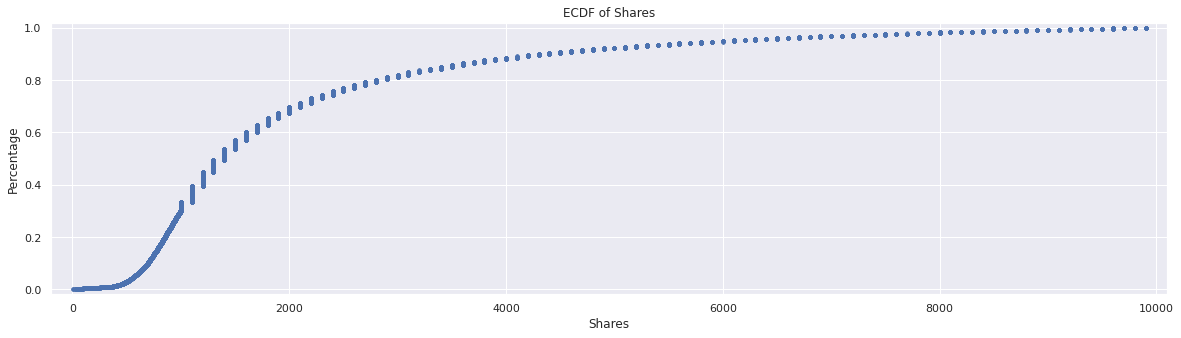

In [ ]:
df_news_10k=df[df.shares<10000]

x,y = ecdf(df_news_10k.shares)
plt.figure(figsize=(20,5))
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Shares')
plt.xlabel('Shares')
plt.ylabel('Percentage')
plt.margins(0.02)
plt.show()
# filter shares less than 10000

Text(0, 0.5, 'Count')

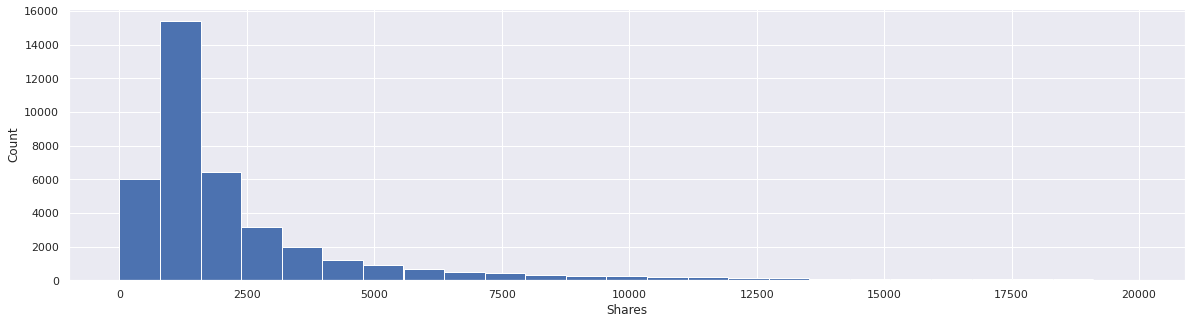

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(df_news_20k.shares, bins=25)
plt.xlabel('Shares')
plt.ylabel('Count')
# plot histgram 

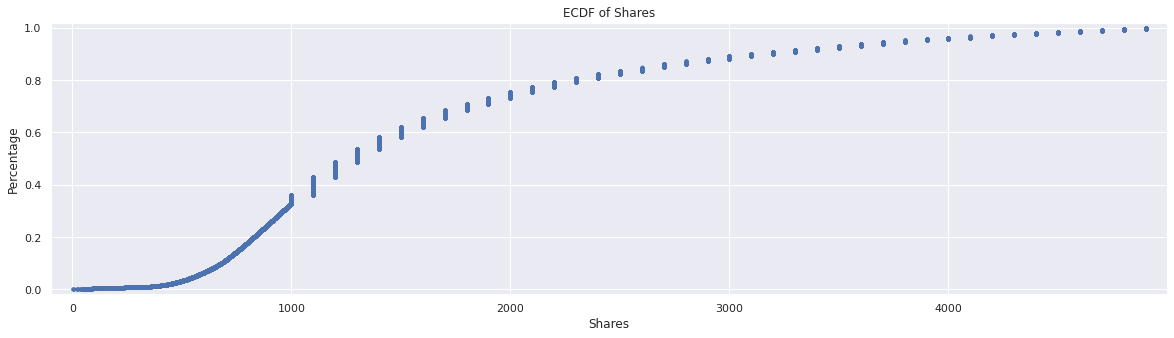

In [ ]:
df_news_5k=df[df.shares<5000]

x,y = ecdf(df_news_5k.shares)
plt.figure(figsize=(20,5))
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Shares')
plt.xlabel('Shares')
plt.ylabel('Percentage')
plt.margins(0.02)
plt.show()
# filter shares less than 5000

Text(0, 0.5, 'Count')

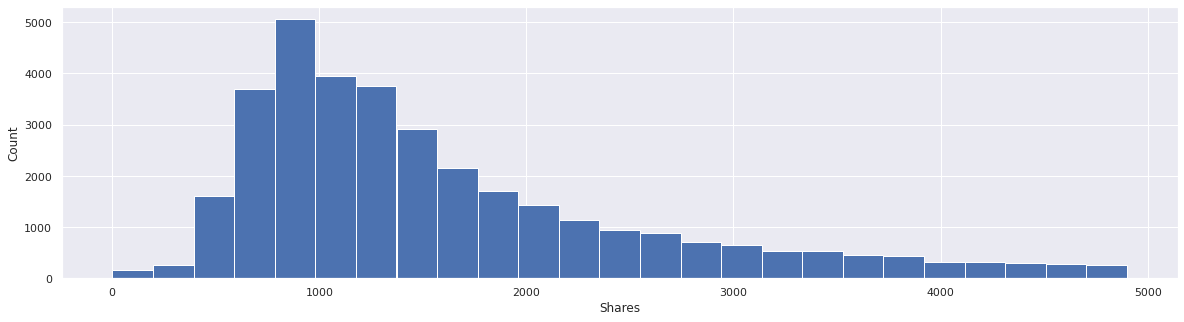

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(df_news_5k.shares, bins=25)
plt.xlabel('Shares')
plt.ylabel('Count')
# plot histogram

#### Its evident that majority of the shares are between 500 and 3000

In [ ]:
df.corr()['shares'].sort_values(ascending=False)
# print correlation coefficients of 'shares' in descending order

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0

### From the analysis above, we conclude that outliers carry significant information and should be considered for modeling.

## **3. Data Modeling**

### Logistic Regression

### Finding Multicollinearity for Logistic Regression

In [ ]:
df.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  min_positive_polarity  \
count    39644.000000  39644.000000  39644.000000  ...           39644.000000   
mean         3.293638      4.544143      1.249874  ...               0.095446   
std          3.855141      8.309434      4.107855  ...               0.071315   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.050000   
50%          3.000000      1.000000      0.000000  ...               0.100000   
75%          4.000000      4.000000      1.000000  ...               0.100000   
max        116.000000    128.000000     91.000000  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    1400.000000  
75%                  0.500000                      0.250000    2

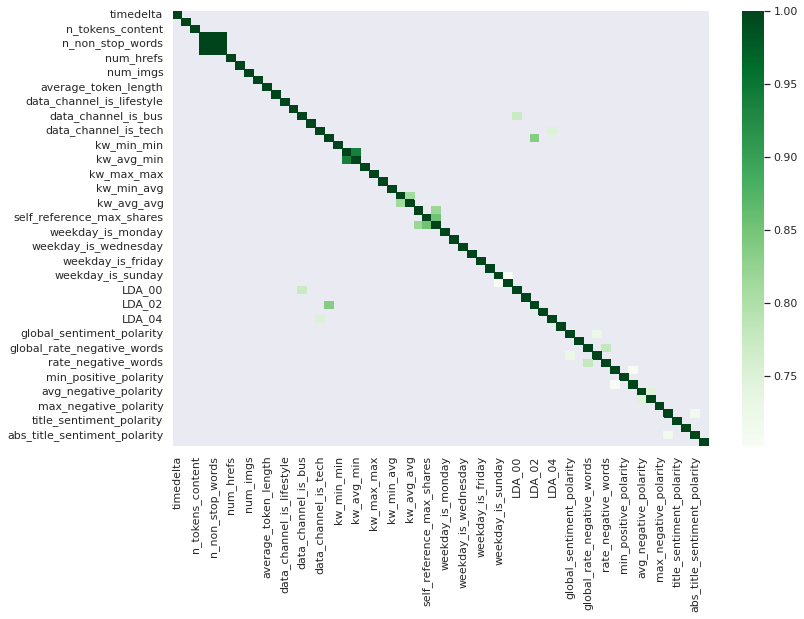

In [ ]:
corr2 = df.corr()

kot = corr2[corr2>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [ ]:
kot

timedelta  n_tokens_title  n_tokens_content  \
timedelta                            1.0             NaN               NaN   
n_tokens_title                       NaN             1.0               NaN   
n_tokens_content                     NaN             NaN               1.0   
n_unique_tokens                      NaN             NaN               NaN   
n_non_stop_words                     NaN             NaN               NaN   
n_non_stop_unique_tokens             NaN             NaN               NaN   
num_hrefs                            NaN             NaN               NaN   
num_self_hrefs                       NaN             NaN               NaN   
num_imgs                             NaN             NaN               NaN   
num_videos                           NaN             NaN               NaN   
average_token_length                 NaN             NaN               NaN   
num_keywords                         NaN             NaN               NaN   
data_channel_is_lifestyle            NaN             NaN               NaN   
data_channel_is_entertainment        NaN             NaN               NaN   
data_channel_is_bus                  NaN             NaN               NaN   
data_channel_is_socmed               NaN             NaN               NaN   
data_channel_is_tech                 NaN             NaN               NaN   
data_channel_is_world                NaN             NaN               NaN   
kw_min_min                           NaN             NaN               NaN   
kw_max_min                           NaN             NaN               NaN   
kw_avg_min                           NaN             NaN               NaN   
kw_min_max                           NaN             NaN               NaN   
kw_max_max                           NaN             NaN               NaN   
kw_avg_max                           NaN             NaN               NaN   
kw_min_avg                           NaN             NaN               NaN   
kw_max_avg                           NaN             NaN               NaN   
kw_avg_avg                           NaN             NaN               NaN   
self_reference_min_shares            NaN             NaN               NaN   
self_reference_max_shares            NaN             NaN               NaN   
self_reference_avg_sharess           NaN             NaN               NaN   
weekday_is_monday                    NaN             NaN               NaN   
weekday_is_tuesday                   NaN             NaN               NaN   
weekday_is_wednesday                 NaN             NaN               NaN   
weekday_is_thursday                  NaN             NaN               NaN   
weekday_is_friday                    NaN             NaN               NaN   
weekday_is_saturday                  NaN             NaN               NaN   
weekday_is_sunday                    NaN             NaN               NaN   
is_weekend                           NaN             NaN               NaN   
LDA_00                               NaN             NaN               NaN   
LDA_01                               NaN             NaN               NaN   
LDA_02                               NaN             NaN               NaN   
LDA_03                               NaN             NaN               NaN   
LDA_04                               NaN             NaN               NaN   
global_subjectivity                  NaN             NaN               NaN   
global_sentiment_polarity            NaN             NaN               NaN   
global_rate_positive_words           NaN             NaN               NaN   
global_rate_negative_words           NaN             NaN               NaN   
rate_positive_words                  NaN             NaN               NaN   
rate_negative_words                  NaN             NaN               NaN   
avg_positive_polarity                NaN             NaN               NaN   
min_positive_polarity                NaN             

#### Code below shows which variables are highly correlated with each other (above 0.7)

In [ ]:
# map features to their absolute correlation values
corr = df.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

corr_cols  = corr.unstack()

# display the highly correlated features
display(corr_cols[corr_cols > 0.7])

n_unique_tokens               n_non_stop_words                0.999572
                              n_non_stop_unique_tokens        0.999852
n_non_stop_words              n_unique_tokens                 0.999572
                              n_non_stop_unique_tokens        0.999532
n_non_stop_unique_tokens      n_unique_tokens                 0.999852
                              n_non_stop_words                0.999532
data_channel_is_bus           LDA_00                          0.774651
data_channel_is_tech          LDA_04                          0.749737
data_channel_is_world         LDA_02                          0.836618
kw_min_min                    kw_max_max                      0.857226
kw_max_min                    kw_avg_min                      0.940529
kw_avg_min                    kw_max_min                      0.940529
kw_max_max                    kw_min_min                      0.857226
kw_max_avg                    kw_avg_avg                      0.811864
kw_avg

In [ ]:
# create a new column based number of shares. Anything over 1400 will be considered "Popular"
df['Is_Popular'] = np.where(df['shares'] >= 1400, 1, 0)
# display the dataframe
df

url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   
...                                                  ...        ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...        8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...        8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...        8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/        8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                      0.815385        4.0             2.0       1.0  ...   
1                      0.791946        3.0             1.0       1.0  ...   
2                      0.663866        3.0             1.0       1.0  ...   
3                      0.665635        9.0             0.0       1.0  ...   
4                      0.540890       19.0            19.0      20.0  ...   
...                         ...        ...             ...       ...  ...   
39639                  0.684783        9.0             7.0       1.0  ...   
39640                  0.885057        9.0             7.0       3.0  ...   
39641                  0.644128       24.0             1.0      12.0  ...   
39642                  0.692661       10.0             1.0       1.0  ...   
39643                  0.846154        1.0             1.0       0.0  ...   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4          

#### Creating new dataframe with new target variable for classification (only 0 and 1) and dropping old target column which was not binary

In [ ]:
df2 = df.drop(columns=['shares', 'url', 'timedelta'])
df2

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
0             0.0              4.680365  ...               0.100000   
1             0.0              4.913725  ...               0.033333   
2             0.0              4.393365  ...               0.100000   
3             0.0              4.404896  ...               0.136364   
4             0.0              4.682836  ...               0.033333   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.100000   
39640        48.0              4.405488  ...               0.136364   
39641         1.0              5.076923  ...               0.136364   
39642         0.0              4.975073  ...               0.062500   
39643         2.0              4.471338  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050

In [ ]:
df2.corr()['Is_Popular'].sort_values(ascending=False)

Is_Popular                       1.000000
kw_avg_avg                       0.157787
is_weekend                       0.140852
data_channel_is_socmed           0.112044
weekday_is_saturday              0.108938
data_channel_is_tech             0.102832
LDA_04                           0.094877
kw_min_avg                       0.090708
num_hrefs                        0.090229
weekday_is_sunday                0.083874
global_sentiment_polarity        0.073547
num_keywords                     0.073085
kw_max_avg                       0.070496
global_subjectivity              0.068059
LDA_00                           0.067253
num_imgs                         0.067193
self_reference_avg_sharess       0.065304
global_rate_positive_words       0.060917
self_reference_max_shares        0.060666
LDA_03                           0.058595
title_sentiment_polarity         0.053474
self_reference_min_shares        0.052911
kw_min_min                       0.051257
rate_positive_words              0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2, df2['Is_Popular'],test_size=0.3, random_state=0)

#### Calculate descriptive statistics for the training data set

In [ ]:
x_train.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    27750.000000      27750.000000     27750.000000      27750.000000   
mean        10.394198        546.995784         0.529997          0.969117   
std          2.108732        473.286919         0.138186          0.173003   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        247.000000         0.470833          1.000000   
50%         10.000000        410.000000         0.538700          1.000000   
75%         12.000000        716.000000         0.608289          1.000000   
max         20.000000       8474.000000         1.000000          1.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              27750.000000  27750.000000    27750.000000  27750.000000   
mean                   0.672135     10.866342        3.288252      4.568649   
std                    0.155623     11.224611        3.800937      8.348647   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625410      4.000000        1.000000      1.000000   
50%                    0.690601      8.000000        3.000000      1.000000   
75%                    0.754839     14.000000        4.000000      4.000000   
max                    1.000000    187.000000       74.000000    128.000000   

         num_videos  average_token_length  ...  min_positive_polarity  \
count  27750.000000          27750.000000  ...           27750.000000   
mean       1.241441              4.542451  ...               0.095246   
std        4.078363              0.857307  ...               0.071545   
min        0.000000              0.000000  ...               0.000000   
25%        0.000000              4.477952  ...               0.050000   
50%        0.000000              4.662031  ...               0.100000   
75%        1.000000              4.850798  ...               0.100000   
max       91.000000              8.041534  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           27750.000000           27750.000000           27750.000000   
mean                0.755406              -0.259725              -0.522187   
std                 0.249105               0.128235               0.290775   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.329245              -0.700000   
50%                 0.800000              -0.254167              -0.500000   
75%                 1.000000              -0.186806              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           27750.000000        27750.000000              27750.000000   
mean               -0.107572            0.282532                  0.070765   
std                 0.095710            0.323864                  0.265551   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.146458   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity    Is_Popular  
count            27750.000000                  27750.000000  27750.000000  
mean                 0.341275                      0.155991      0.534955  
std                  0.188970                      0.226255      0.498786  
min                  0.000000                      0.000000      0.000000  
25%                  0.166667                      0.000000      0.000000  
50%                  0.500000                      0.000000      1.00000

#### Calculate descriptive statistics for the test data set

In [ ]:
x_test.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    11894.000000      11894.000000     11894.000000      11894.000000   
mean        10.409366        545.392383         0.590722          1.060282   
std          2.126413        466.000916         6.424210          9.546876   
min          3.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470946          1.000000   
50%         10.000000        409.000000         0.540297          1.000000   
75%         12.000000        716.000000         0.609053          1.000000   
max         23.000000       7185.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              11894.000000  11894.000000    11894.000000  11894.000000   
mean                   0.728933     10.924163        3.306205      4.486968   
std                    5.955755     11.579111        3.978869      8.217281   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.626634      4.000000        1.000000      1.000000   
50%                    0.690343      8.000000        3.000000      1.000000   
75%                    0.754323     13.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    111.000000   

         num_videos  average_token_length  ...  min_positive_polarity  \
count  11894.000000          11894.000000  ...           11894.000000   
mean       1.269548              4.561744  ...               0.095911   
std        4.175961              0.813384  ...               0.070777   
min        0.000000              0.000000  ...               0.000000   
25%        0.000000              4.479242  ...               0.050000   
50%        0.000000              4.668363  ...               0.100000   
75%        1.000000              4.863358  ...               0.100000   
max       74.000000              7.974684  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           11894.000000           11894.000000           11894.000000   
mean                0.759811              -0.259056              -0.521377   
std                 0.244662               0.126533               0.289165   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.326190              -0.700000   
50%                 0.800000              -0.251825              -0.500000   
75%                 1.000000              -0.187211              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           11894.000000        11894.000000              11894.000000   
mean               -0.107333            0.281937                  0.072965   
std                 0.094586            0.325152                  0.265220   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.133333                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity    Is_Popular  
count            11894.000000                  11894.000000  11894.000000  
mean                 0.343167                      0.156234      0.530436  
std                  0.188374                      0.226395      0.499094  
min                  0.000000                      0.000000      0.000000  
25%                  0.166667                      0.000000      0.000000  
50%                  0.500000                      0.000000      1.00000

In [ ]:
y_test.describe()

count    11894.000000
mean         0.530436
std          0.499094
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Is_Popular, dtype: float64

In [ ]:
y_test.head(20)

18765    0
16349    1
27703    1
32947    1
35434    1
37965    0
21595    1
29565    0
19175    1
29417    1
35994    0
17847    0
34144    0
13462    0
31618    1
24555    1
37776    0
4003     1
33148    1
4487     1
Name: Is_Popular, dtype: int64

In [ ]:
x_test.head(20)

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
18765             8.0             810.0         0.455696               1.0   
16349            12.0             122.0         0.678571               1.0   
27703            12.0             891.0         0.391455               1.0   
32947             9.0            1323.0         0.380952               1.0   
35434             8.0             261.0         0.596154               1.0   
37965            12.0             413.0         0.598063               1.0   
21595            15.0            2642.0         0.386714               1.0   
29565            10.0             255.0         0.591270               1.0   
19175             9.0             315.0         0.572347               1.0   
29417            11.0             366.0         0.565574               1.0   
35994            10.0             376.0         0.525745               1.0   
17847            11.0             255.0         0.616667               1.0   
34144             9.0             187.0         0.609626               1.0   
13462            13.0            1013.0         0.504115               1.0   
31618            12.0             945.0         0.384951               1.0   
24555             9.0             186.0         0.636872               1.0   
37776            12.0             590.0         0.536752               1.0   
4003              9.0             766.0         0.497920               1.0   
33148             9.0             642.0         0.486529               1.0   
4487             12.0             232.0         0.463303               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
18765                  0.623950       16.0             7.0       1.0   
16349                  0.783333        7.0             2.0       1.0   
27703                  0.483649        6.0             3.0      22.0   
32947                  0.530740       31.0            11.0      13.0   
35434                  0.721212        8.0             3.0       4.0   
37965                  0.786885        6.0             1.0       2.0   
21595                  0.553350       16.0             9.0      51.0   
29565                  0.753247        1.0             1.0       1.0   
19175                  0.775281        2.0             1.0       1.0   
29417                  0.728111        6.0             5.0       1.0   
35994                  0.731132        3.0             1.0       2.0   
17847                  0.748344        3.0             2.0       1.0   
34144                  0.734513        4.0             1.0       0.0   
13462                  0.693603        6.0             5.0       0.0   
31618                  0.474398        3.0             3.0      28.0   
24555                  0.786408        6.0             5.0       0.0   
37776                  0.691099        2.0             1.0       1.0   
4003                   0.644252       30.0             0.0       1.0   
33148                  0.645503        9.0             2.0       1.0   
4487                   0.562963        3.0             2.0       1.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
18765         0.0              4.943210  ...               0.100000   
16349         0.0              4.557377  ...               0.500000   
27703         2.0              4.712682  ...               0.100000   
32947         0.0              4.561602  ...               0.062500   
35434         0.0              4.601533  ...               0.033333   
37965         0.0              4.733656  ...               0.100000   
21595         0.0              4.514762  ...               0.033333   
29565         0.0              5.192157  ...               0.062500   
19175         2.0              4.355556  ...               0.100000   
29417         1.0              4.622951  ...               0.033333   
35994         0.0              4.547872  ...               0.100000   
178

In [ ]:
# Highest correlation with Target
Logmdl_1=logit("Is_Popular ~ kw_avg_avg", data=x_train).fit()
Logmdl_1.summary()

Optimization terminated successfully.
         Current function value: 0.674850
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27748
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.02295
Time:                        17:09:48   Log-Likelihood:                -18727.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                2.436e-193
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8824      0.039    -22.847      0.000      -0.958      -0.807
kw_avg_avg     0.0003    1.2e-05     27.496      0.000       0.000       0.000
==============================================================================
"""

In [ ]:
# 2 Highest correlation with Target
Logmdl_2=logit("Is_Popular ~ kw_avg_avg + data_channel_is_world", data=x_train).fit()
Logmdl_2.summary()

Optimization terminated successfully.
         Current function value: 0.668853
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27747
Method:                           MLE   Df Model:                            2
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.03163
Time:                        17:09:49   Log-Likelihood:                -18561.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                4.832e-264
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.5738      0.041    -13.843      0.000      -0.655      -0.493
kw_avg_avg                0.0003   1.22e-05     22.052      0.000       0.000       0.000
data_channel_is_world    -0.5671      0.031    -18.120      0.000      -0.628      -0.506
=========================================================================================
"""

In [ ]:
# 3 Highest correlation with Target
Logmdl_3=logit("Is_Popular ~ kw_avg_avg + data_channel_is_world + data_channel_is_entertainment", data=x_train).fit()
Logmdl_3.summary()

Optimization terminated successfully.
         Current function value: 0.656565
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27746
Method:                           MLE   Df Model:                            3
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.04942
Time:                        17:09:50   Log-Likelihood:                -18220.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3402      0.043     -7.959      0.000      -0.424      -0.256
kw_avg_avg                        0.0003   1.24e-05     20.971      0.000       0.000       0.000
data_channel_is_world            -0.7751      0.032    -23.944      0.000      -0.839      -0.712
data_channel_is_entertainment    -0.8591      0.033    -25.846      0.000      -0.924      -0.794
=================================================================================================
"""

In [ ]:
# 4
Logmdl_4=logit("Is_Popular ~ kw_avg_avg + data_channel_is_world + data_channel_is_entertainment + data_channel_is_socmed", data=x_train).fit()
Logmdl_4.summary()

Optimization terminated successfully.
         Current function value: 0.653743
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27745
Method:                           MLE   Df Model:                            4
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.05351
Time:                        17:09:51   Log-Likelihood:                -18141.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.4140      0.043     -9.596      0.000      -0.499      -0.329
kw_avg_avg                        0.0003   1.23e-05     21.238      0.000       0.000       0.000
data_channel_is_world            -0.7088      0.033    -21.616      0.000      -0.773      -0.645
data_channel_is_entertainment    -0.7946      0.034    -23.641      0.000      -0.860      -0.729
data_channel_is_socmed            0.7180      0.060     11.965      0.000       0.600       0.836
=================================================================================================
"""

In [ ]:
#5 - 
Logmdl_5=logit("Is_Popular ~ kw_avg_avg + data_channel_is_world + data_channel_is_entertainment + data_channel_is_socmed + weekday_is_saturday", data=x_train).fit()
Logmdl_5.summary()

Optimization terminated successfully.
         Current function value: 0.648172
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27744
Method:                           MLE   Df Model:                            5
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.06157
Time:                        17:09:52   Log-Likelihood:                -17987.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.4486      0.043    -10.373      0.000      -0.533      -0.364
kw_avg_avg                        0.0003   1.24e-05     20.794      0.000       0.000       0.000
data_channel_is_world            -0.7242      0.033    -21.938      0.000      -0.789      -0.659
data_channel_is_entertainment    -0.7968      0.034    -23.569      0.000      -0.863      -0.731
data_channel_is_socmed            0.7069      0.060     11.732      0.000       0.589       0.825
weekday_is_saturday               0.9681      0.058     16.706      0.000       0.855       1.082
=================================================================================================
"""

In [ ]:
#6 - 
Logmdl_6=logit("Is_Popular ~ kw_avg_avg + data_channel_is_world + data_channel_is_entertainment + data_channel_is_socmed + weekday_is_saturday + data_channel_is_tech", data=x_train).fit()
Logmdl_6.summary()

Optimization terminated successfully.
         Current function value: 0.645330
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27743
Method:                           MLE   Df Model:                            6
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.06569
Time:                        17:09:53   Log-Likelihood:                -17908.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.7513      0.050    -15.007      0.000      -0.849      -0.653
kw_avg_avg                        0.0003    1.3e-05     23.149      0.000       0.000       0.000
data_channel_is_world            -0.5340      0.036    -14.683      0.000      -0.605      -0.463
data_channel_is_entertainment    -0.6350      0.036    -17.550      0.000      -0.706      -0.564
data_channel_is_socmed            0.8715      0.062     14.122      0.000       0.751       0.992
weekday_is_saturday               0.9527      0.058     16.390      0.000       0.839       1.067
data_channel_is_tech              0.4674      0.038     12.462      0.000       0.394       0.541
=================================================================================================
"""

In [ ]:
#7 - 
Logmdl_7=logit("Is_Popular ~ kw_avg_avg + data_channel_is_world + data_channel_is_entertainment + data_channel_is_socmed + weekday_is_saturday + data_channel_is_tech + kw_min_avg", data=x_train).fit()
Logmdl_7.summary()

Optimization terminated successfully.
         Current function value: 0.645290
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27742
Method:                           MLE   Df Model:                            7
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.06575
Time:                        17:09:55   Log-Likelihood:                -17907.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.7676      0.051    -14.931      0.000      -0.868      -0.667
kw_avg_avg                        0.0003   1.53e-05     20.506      0.000       0.000       0.000
data_channel_is_world            -0.5305      0.036    -14.551      0.000      -0.602      -0.459
data_channel_is_entertainment    -0.6330      0.036    -17.480      0.000      -0.704      -0.562
data_channel_is_socmed            0.8767      0.062     14.186      0.000       0.756       0.998
weekday_is_saturday               0.9533      0.058     16.401      0.000       0.839       1.067
data_channel_is_tech              0.4712      0.038     12.533      0.000       0.398       0.545
kw_min_avg                     -1.97e-05   1.33e-05     -1.486      0.137   -4.57e-05    6.28e-06
=================================================================================================
"""

In [ ]:
#8 - 
Logmdl_8=logit("Is_Popular ~ kw_avg_avg + data_channel_is_world + data_channel_is_entertainment + data_channel_is_socmed + weekday_is_saturday + data_channel_is_tech + num_hrefs", data=x_train).fit()
Logmdl_8.summary()

Optimization terminated successfully.
         Current function value: 0.642919
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27742
Method:                           MLE   Df Model:                            7
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.06918
Time:                        17:09:56   Log-Likelihood:                -17841.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.8520      0.051    -16.750      0.000      -0.952      -0.752
kw_avg_avg                        0.0003   1.31e-05     21.881      0.000       0.000       0.000
data_channel_is_world            -0.5362      0.036    -14.727      0.000      -0.608      -0.465
data_channel_is_entertainment    -0.6337      0.036    -17.466      0.000      -0.705      -0.563
data_channel_is_socmed            0.8580      0.062     13.864      0.000       0.737       0.979
weekday_is_saturday               0.9314      0.058     15.965      0.000       0.817       1.046
data_channel_is_tech              0.4837      0.038     12.868      0.000       0.410       0.557
num_hrefs                         0.0140      0.001     11.186      0.000       0.012       0.016
=================================================================================================
"""

In [ ]:
#9 - model 8 without intercept
Logmdl_9=logit("Is_Popular ~ kw_avg_avg + data_channel_is_world + data_channel_is_entertainment + data_channel_is_socmed + weekday_is_saturday + data_channel_is_tech + num_hrefs + 0", data=x_train).fit()
Logmdl_9.summary()

Optimization terminated successfully.
         Current function value: 0.648234
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27743
Method:                           MLE   Df Model:                            6
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.06148
Time:                        17:09:59   Log-Likelihood:                -17989.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
kw_avg_avg                        0.0001   6.09e-06     16.500      0.000    8.86e-05       0.000
data_channel_is_world            -0.8743      0.030    -28.796      0.000      -0.934      -0.815
data_channel_is_entertainment    -0.8538      0.034    -25.429      0.000      -0.920      -0.788
data_channel_is_socmed            0.6321      0.060     10.514      0.000       0.514       0.750
weekday_is_saturday               0.9081      0.058     15.636      0.000       0.794       1.022
data_channel_is_tech              0.1708      0.033      5.229      0.000       0.107       0.235
num_hrefs                         0.0100      0.001      8.442      0.000       0.008       0.012
=================================================================================================
"""

In [ ]:
#10 - 
Logmdl_10=logit("Is_Popular ~ n_unique_tokens + kw_avg_max + kw_max_avg + kw_avg_avg + self_reference_avg_sharess + LDA_01 + LDA_02 + LDA_03 + LDA_04 + 0", data=x_train).fit()
Logmdl_10.summary()

Optimization terminated successfully.
         Current function value: 0.646791
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Is_Popular   No. Observations:                27750
Model:                          Logit   Df Residuals:                    27741
Method:                           MLE   Df Model:                            8
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.06357
Time:                        17:10:01   Log-Likelihood:                -17948.
converged:                       True   LL-Null:                       -19167.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
n_unique_tokens               -0.7978      0.070    -11.392      0.000      -0.935      -0.661
kw_avg_max                   -2.2e-06   1.18e-07    -18.724      0.000   -2.43e-06   -1.97e-06
kw_max_avg                  -8.83e-05   4.59e-06    -19.221      0.000   -9.73e-05   -7.93e-05
kw_avg_avg                     0.0007   2.22e-05     32.677      0.000       0.001       0.001
self_reference_avg_sharess  6.664e-06   9.51e-07      7.005      0.000     4.8e-06    8.53e-06
LDA_01                        -1.4048      0.066    -21.168      0.000      -1.535      -1.275
LDA_02                        -1.1717      0.050    -23.221      0.000      -1.271      -1.073
LDA_03                        -0.8832      0.061    -14.441      0.000      -1.003      -0.763
LDA_04                        -0.0418      0.053     -0.782      0.434      -0.146       0.063
==============================================================================================
"""

#### Pseudo R-squared is worse. Seems like Model "Logmdl_8" had the highest R-squared (0.06918) out of all models although it is still low. All variables in model also have significant p-values

In [ ]:
# performing prediction on Logmdl_8
y_pred = Logmdl_8.predict(x_test)

In [ ]:
y_pred.describe()

count    11894.000000
mean         0.534236
std          0.150522
min          0.210405
25%          0.392683
50%          0.540877
75%          0.641633
max          0.999992
dtype: float64

In [ ]:
y_pred

18765    0.378269
16349    0.609918
27703    0.598701
32947    0.711488
35434    0.800187
           ...   
10206    0.267313
30325    0.526810
35491    0.682250
26829    0.367089
21438    0.361896
Length: 11894, dtype: float64

In [ ]:
y_pred_rounded = y_pred.round(0)
y_pred_rounded

18765    0.0
16349    1.0
27703    1.0
32947    1.0
35434    1.0
        ... 
10206    0.0
30325    1.0
35491    1.0
26829    0.0
21438    0.0
Length: 11894, dtype: float64

In [ ]:
y_test

18765    0
16349    1
27703    1
32947    1
35434    1
        ..
10206    1
30325    0
35491    0
26829    0
21438    0
Name: Is_Popular, Length: 11894, dtype: int64

In [ ]:
cm = confusion_matrix(y_test, y_pred_rounded)
cm

array([[3155, 2430],
       [1946, 4363]])

In [ ]:
acc_score = accuracy_score(y_test, y_pred_rounded)
acc_score

0.6320834033966706

In [ ]:
auc = roc_auc_score(y_test, y_pred_rounded)
print(round(auc,5))

0.62823


In [ ]:
ps = precision_score(y_test, y_pred_rounded)
ps

0.6422788164286766

### Logistic Regression test for overfitting

In [ ]:
df_news['TARGET'] = np.where( df_news.shares >= 1400, 1, 0)
# convert target feature to categorical 

first_column = df_news.pop('TARGET')
  
# insert column using insert(position,column_name,first_column) function
df_news.insert(0, 'TARGET', first_column)
df_news.head()

TARGET                                                url  timedelta  \
0       0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1       0  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2       1  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3       0  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       0   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385        4.0             2.0  ...   
1                  0.791946        3.0             1.0  ...   
2                  0.663866        3.0             1.0  ...   
3                  0.665635        9.0             0.0  ...   
4                  0.540890       19.0            19.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 62 columns]

In [ ]:
df_news_new = df_news.drop(['url', 'timedelta', 'shares'], axis = 1)
df_news_new.head()

TARGET  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0            12.0             219.0         0.663594   
1       0             9.0             255.0         0.604743   
2       1             9.0             211.0         0.575130   
3       0             9.0             531.0         0.503788   
4       0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

In [ ]:
data = df_news_new.sample(frac=0.9, random_state=786)
data_unseen = df_news_new.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (35680, 59)
Unseen Data For Predictions: (3964, 59)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data['TARGET'],test_size=0.3, random_state=0)

In [ ]:
from statsmodels.formula.api import logit

#8 - 
Logmdl_8=logit("TARGET ~ kw_avg_avg + data_channel_is_world + data_channel_is_entertainment + data_channel_is_socmed + weekday_is_saturday + data_channel_is_tech + num_hrefs", data=X_train).fit()
Logmdl_8.summary()

Optimization terminated successfully.
         Current function value: 0.643668
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                24976
Model:                          Logit   Df Residuals:                    24968
Method:                           MLE   Df Model:                            7
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                 0.06830
Time:                        19:20:24   Log-Likelihood:                -16076.
converged:                       True   LL-Null:                       -17255.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.8532      0.053    -16.052      0.000      -0.957      -0.749
kw_avg_avg                        0.0003   1.37e-05     20.850      0.000       0.000       0.000
data_channel_is_world            -0.5408      0.038    -14.115      0.000      -0.616      -0.466
data_channel_is_entertainment    -0.6001      0.038    -15.740      0.000      -0.675      -0.525
data_channel_is_socmed            0.9099      0.066     13.851      0.000       0.781       1.039
weekday_is_saturday               0.9265      0.062     14.881      0.000       0.805       1.049
data_channel_is_tech              0.4749      0.039     12.028      0.000       0.398       0.552
num_hrefs                         0.0135      0.001     10.391      0.000       0.011       0.016
=================================================================================================
"""

In [ ]:
# performing prediction on Logmdl_8
y_pred = Logmdl_8.predict(X_test)

In [ ]:
y_pred_rounded = y_pred.round(0)

In [ ]:
acc_score_test = accuracy_score(y_test, y_pred_rounded)
acc_score_test

0.6322869955156951

In [ ]:
# performing prediction on Logmdl_8
y_pred_train = Logmdl_8.predict(X_train)

In [ ]:
y_pred_rounded_train = y_pred_train.round(0)

In [ ]:
acc_score_train = accuracy_score(y_train, y_pred_rounded_train)
acc_score_train

0.6380124919923126

## Random Forest

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.datasets import get_data
dataset = get_data('OnlineNewsPopularity-1')

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0               12                219          0.663594                1.0   
1                9                255          0.604743                1.0   
2                9                211          0.575130                1.0   
3                9                531          0.503788                1.0   
4               13               1072          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385           4                2          1   
1                   0.791946           3                1          1   
2                   0.663866           3                1          1   
3                   0.665635           9                0          1   
4                   0.540890          19               19         20   

    num_videos   average_token_length  ...   min_positive_polarity  \
0            0               4.680365  ...                0.100000   
1            0               4.913725  ...                0.033333   
2            0               4.393365  ...                0.100000   
3            0               4.404896  ...                0.136364   
4            0               4.682836  ...                0.033333   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   
4                     1.0               -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                 0.000000                       0.187500        0  
1                 0.500000                       0.000000        0  
2                 0.500000                       0.000000        1  
3                 0.500000                       0.000000        0  
4                 0.045455                       0.136364        0  

[5 rows x 59 columns]

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37662, 59)
Unseen Data For Predictions: (1982, 59)


In [ ]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = ' shares', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target            shares
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data       (37662, 59)
5                           Missing Values             False
6                         Numeric Features                41
7                     Categorical Features                17
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set      (26363, 100)
12                    Transformed Test Set      (11299, 100)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              7a54
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
rf = create_model('rf', return_train_score = True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split    Fold                                                          
CV-Train 0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
CV-Val   0       0.6663  0.7321  0.6626  0.6636  0.6631  0.3325  0.3325
         1       0.6633  0.7208  0.6580  0.6610  0.6595  0.3264  0.3264
         2       0.6451  0.7076  0.6335  0.6444  0.6389  0.2899  0.2900
         3       0.6715  0.7299  0.6664  0.6695  0.6679  0.3429  0.3429
         4       0.6571  0.7216  0.6534  0.6544  0.6539  0.3141  0.3141
         5       0.6684  0.7176  0.6526  0.6701  0.6612  0.3367  0.3368
         6       0.6692  0.7300  0.6695  0.6654  0.6674  0.3384  0.3384
         7       0.6711  0.7265  0.6519  0.6741  0.6628  0.3420  0.3421
         8       0.6563  0.7164  0.6358  0.6590  0.6472  0.3123  0.3125
         9       0.6631  0.7200  0.6585  0.6605  0.6595  0.3262  0.3262
CV-Train Mean    1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
         Std     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
CV-Val   Mean    0.6631  0.7223  0.6542  0.6622  0.6581  0.3261  0.3262
         Std     0.0079  0.0071  0.0112  0.0081  0.0087  0.0157  0.0157
Train    NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


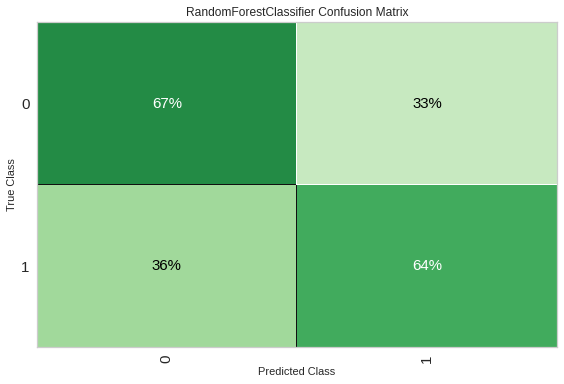

In [ ]:
plot_model(rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [ ]:
tuned_rf = tune_model(rf, optimize = 'Accuracy')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6466  0.7020  0.6733  0.6354  0.6538  0.2934  0.2940
1       0.6488  0.6976  0.6733  0.6381  0.6552  0.2980  0.2984
2       0.6397  0.6904  0.6572  0.6312  0.6439  0.2797  0.2799
3       0.6491  0.7069  0.6817  0.6364  0.6583  0.2985  0.2993
4       0.6487  0.7053  0.6634  0.6408  0.6519  0.2976  0.2978
5       0.6453  0.6959  0.6771  0.6330  0.6543  0.2910  0.2916
6       0.6521  0.7065  0.6832  0.6397  0.6607  0.3046  0.3053
7       0.6635  0.7111  0.6802  0.6546  0.6672  0.3272  0.3274
8       0.6491  0.6965  0.6656  0.6406  0.6529  0.2984  0.2986
9       0.6434  0.6961  0.6907  0.6273  0.6574  0.2874  0.2888
Mean    0.6486  0.7008  0.6746  0.6377  0.6556  0.2976  0.2981
Std     0.0060  0.0062  0.0097  0.0070  0.0058  0.0119  0.0118

In [ ]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


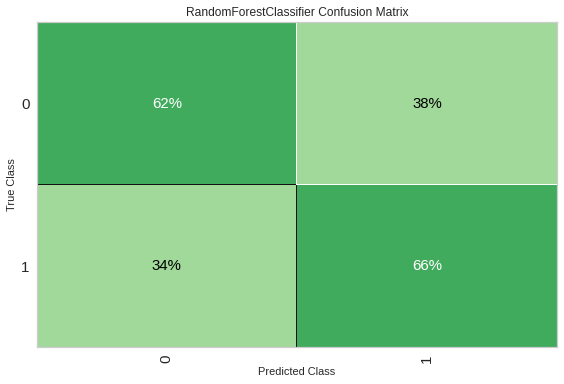

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6559  0.7179  0.6557  0.6521  0.6539  0.3118  0.3118
1       0.6648  0.7275  0.6777  0.6569  0.6671  0.3297  0.3298
2       0.6630  0.7213  0.6589  0.6605  0.6597  0.3260  0.3260
Mean    0.6612  0.7222  0.6641  0.6565  0.6602  0.3225  0.3225
Std     0.0038  0.0040  0.0097  0.0034  0.0054  0.0077  0.0078

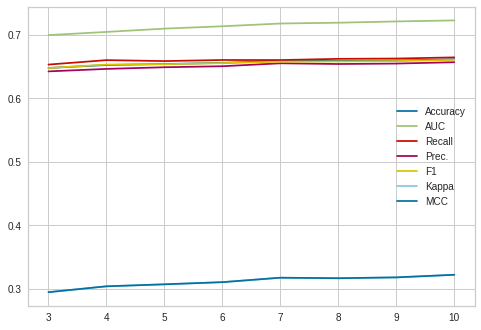

In [ ]:
models = []
results = []

for i in np.arange(3,11,1):
    model = create_model('rf', fold =3, max_depth = i)
    model_results = pull().loc[['Mean']]
    models.append(model)
    results.append(model_results)
    
results = pd.concat(results, axis=0)
results.index = np.arange(3,11,1)
results.plot()

In [ ]:
rf_max_depth = [create_model('rf', fold = 10, return_train_score = True, max_depth = 7)]

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split    Fold                                                          
CV-Train 0       0.6937  0.7634  0.7005  0.6876  0.6940  0.3875  0.3875
         1       0.6936  0.7642  0.6984  0.6882  0.6933  0.3873  0.3873
         2       0.6934  0.7645  0.7023  0.6864  0.6943  0.3868  0.3869
         3       0.6918  0.7622  0.6959  0.6867  0.6912  0.3837  0.3837
         4       0.6927  0.7637  0.6961  0.6878  0.6919  0.3854  0.3854
         5       0.6958  0.7644  0.6980  0.6913  0.6946  0.3916  0.3916
         6       0.6934  0.7631  0.6980  0.6880  0.6930  0.3868  0.3868
         7       0.6936  0.7634  0.6960  0.6891  0.6925  0.3873  0.3873
         8       0.6955  0.7644  0.6974  0.6911  0.6943  0.3910  0.3910
         9       0.6955  0.7650  0.7008  0.6900  0.6953  0.3911  0.3912
CV-Val   0       0.6549  0.7202  0.6649  0.6480  0.6563  0.3099  0.3100
         1       0.6576  0.7181  0.6634  0.6519  0.6576  0.3152  0.3152
         2       0.6409  0.7035  0.6427  0.6364  0.6395  0.2818  0.2818
         3       0.6662  0.7275  0.6756  0.6594  0.6674  0.3324  0.3325
         4       0.6563  0.7198  0.6549  0.6529  0.6539  0.3126  0.3126
         5       0.6548  0.7090  0.6664  0.6476  0.6569  0.3097  0.3098
         6       0.6643  0.7217  0.6764  0.6568  0.6664  0.3286  0.3288
         7       0.6734  0.7287  0.6733  0.6697  0.6715  0.3467  0.3467
         8       0.6559  0.7121  0.6473  0.6548  0.6510  0.3117  0.3117
         9       0.6574  0.7134  0.6753  0.6481  0.6614  0.3151  0.3153
CV-Train Mean    0.6939  0.7638  0.6983  0.6886  0.6934  0.3878  0.3879
         Std     0.0012  0.0008  0.0021  0.0016  0.0012  0.0025  0.0025
CV-Val   Mean    0.6582  0.7174  0.6640  0.6526  0.6582  0.3164  0.3165
         Std     0.0081  0.0076  0.0115  0.0083  0.0087  0.0163  0.0163
Train    NaN     0.6902  0.7611  0.6974  0.6839  0.6906  0.3804  0.3805

In [ ]:
rf_max_depth_best = [create_model('rf', fold = 10, return_train_score = True, max_depth = 4)]

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split    Fold                                                          
CV-Train 0       0.6579  0.7131  0.6665  0.6515  0.6589  0.3159  0.3159
         1       0.6562  0.7132  0.6622  0.6506  0.6564  0.3125  0.3126
         2       0.6586  0.7147  0.6723  0.6507  0.6613  0.3174  0.3176
         3       0.6561  0.7120  0.6647  0.6497  0.6571  0.3123  0.3124
         4       0.6580  0.7152  0.6568  0.6546  0.6557  0.3160  0.3160
         5       0.6603  0.7164  0.6650  0.6551  0.6600  0.3207  0.3208
         6       0.6576  0.7135  0.6603  0.6529  0.6566  0.3152  0.3152
         7       0.6584  0.7155  0.6654  0.6524  0.6588  0.3169  0.3169
         8       0.6597  0.7153  0.6640  0.6545  0.6592  0.3194  0.3194
         9       0.6585  0.7152  0.6651  0.6527  0.6588  0.3171  0.3172
CV-Val   0       0.6458  0.7052  0.6557  0.6391  0.6473  0.2917  0.2918
         1       0.6458  0.7013  0.6488  0.6410  0.6449  0.2916  0.2917
         2       0.6405  0.6913  0.6458  0.6351  0.6404  0.2811  0.2811
         3       0.6559  0.7107  0.6664  0.6490  0.6576  0.3119  0.3121
         4       0.6472  0.7065  0.6373  0.6462  0.6418  0.2943  0.2943
         5       0.6521  0.7004  0.6618  0.6455  0.6536  0.3043  0.3044
         6       0.6544  0.7099  0.6679  0.6467  0.6571  0.3089  0.3091
         7       0.6677  0.7165  0.6702  0.6631  0.6667  0.3354  0.3354
         8       0.6544  0.6992  0.6526  0.6511  0.6519  0.3088  0.3088
         9       0.6495  0.7015  0.6715  0.6392  0.6550  0.2992  0.2996
CV-Train Mean    0.6581  0.7144  0.6642  0.6525  0.6583  0.3164  0.3164
         Std     0.0013  0.0013  0.0039  0.0017  0.0017  0.0025  0.0025
CV-Val   Mean    0.6513  0.7043  0.6578  0.6456  0.6516  0.3027  0.3028
         Std     0.0071  0.0067  0.0110  0.0075  0.0077  0.0142  0.0142
Train    NaN     0.6588  0.7141  0.6691  0.6518  0.6604  0.3177  0.3178

In [ ]:
boosted_rf = ensemble_model(rf, method = 'Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6682  0.7266  0.6595  0.6672  0.6633  0.3363  0.3363
1       0.6568  0.7222  0.6404  0.6580  0.6491  0.3134  0.3135
2       0.6451  0.7083  0.6312  0.6450  0.6381  0.2899  0.2900
3       0.6810  0.7375  0.6771  0.6787  0.6779  0.3619  0.3619
4       0.6578  0.7268  0.6419  0.6591  0.6504  0.3154  0.3155
5       0.6521  0.7174  0.6412  0.6516  0.6464  0.3041  0.3041
6       0.6669  0.7279  0.6572  0.6664  0.6618  0.3337  0.3337
7       0.6737  0.7298  0.6572  0.6758  0.6664  0.3473  0.3474
8       0.6681  0.7177  0.6366  0.6753  0.6554  0.3358  0.3363
9       0.6654  0.7160  0.6623  0.6623  0.6623  0.3307  0.3307
Mean    0.6635  0.7230  0.6505  0.6640  0.6571  0.3268  0.3270
Std     0.0101  0.0080  0.0136  0.0104  0.0109  0.0202  0.0202

In [ ]:
print(boosted_rf)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

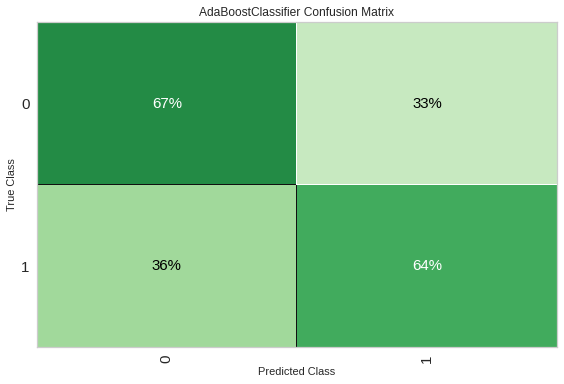

In [ ]:
plot_model(boosted_rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [ ]:
bagged_rf = ensemble_model(rf, method = 'Bagging')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6614  0.7328  0.6702  0.6547  0.6624  0.3228  0.3229
1       0.6731  0.7291  0.6702  0.6702  0.6702  0.3462  0.3462
2       0.6583  0.7153  0.6595  0.6540  0.6568  0.3166  0.3167
3       0.6722  0.7398  0.6809  0.6657  0.6732  0.3445  0.3446
4       0.6658  0.7299  0.6679  0.6614  0.6646  0.3316  0.3316
5       0.6582  0.7200  0.6649  0.6524  0.6586  0.3164  0.3165
6       0.6726  0.7311  0.6894  0.6635  0.6762  0.3454  0.3456
7       0.6802  0.7338  0.6832  0.6755  0.6793  0.3604  0.3604
8       0.6696  0.7279  0.6557  0.6706  0.6631  0.3390  0.3391
9       0.6700  0.7222  0.6792  0.6629  0.6710  0.3400  0.3401
Mean    0.6681  0.7282  0.6721  0.6631  0.6675  0.3363  0.3364
Std     0.0068  0.0069  0.0103  0.0073  0.0072  0.0135  0.0136

In [ ]:
print(bagged_rf)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

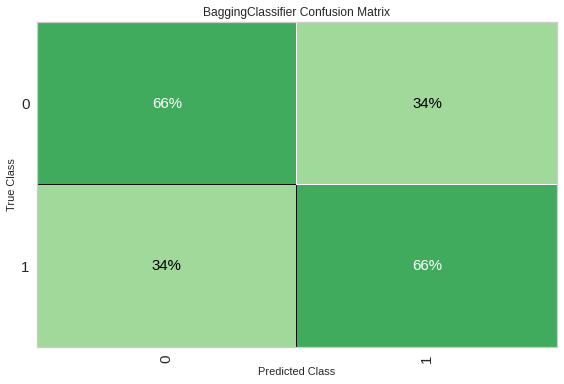

In [ ]:
plot_model(bagged_rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

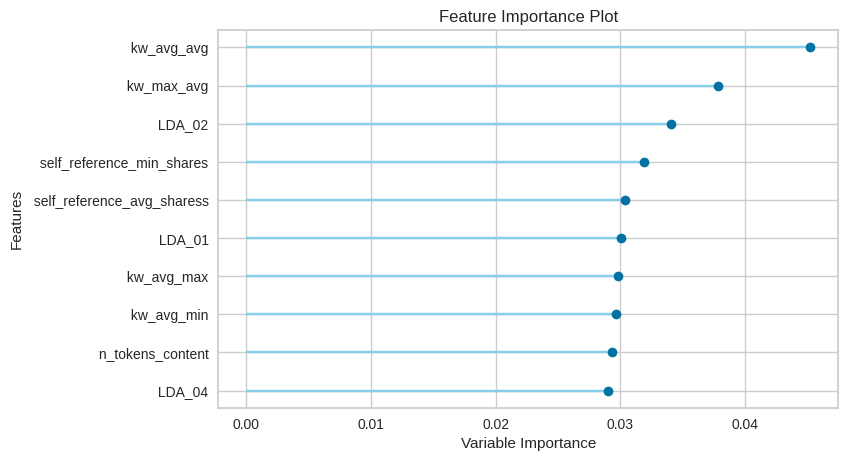

In [ ]:
plot_model(rf, plot='feature')

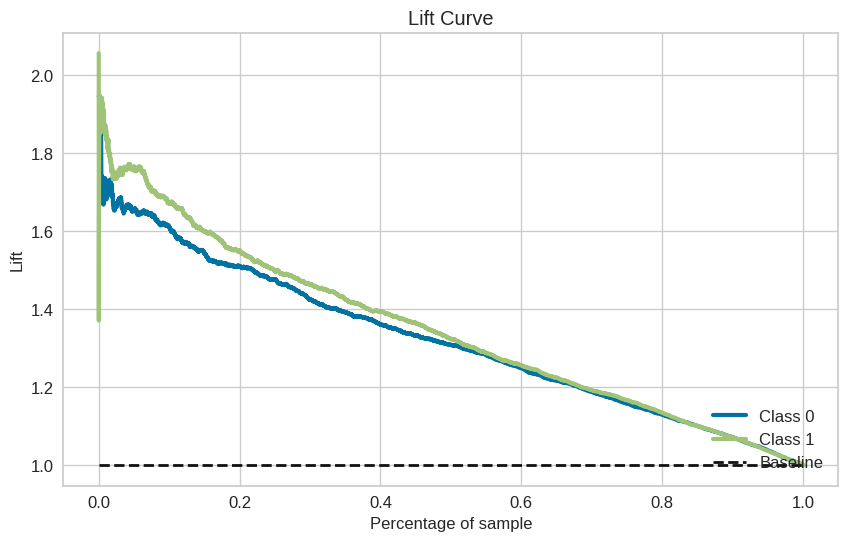

In [ ]:
plot_model(rf, plot = 'lift')

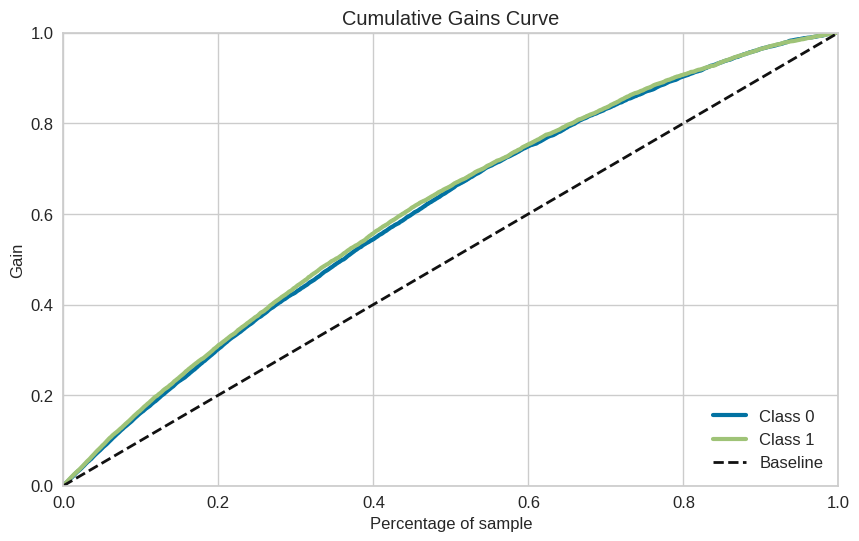

In [ ]:
plot_model(rf, plot = 'gain')

In [ ]:
unseen_predictions = predict_model(rf, data=data_unseen)
unseen_predictions.head()

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.6443  0.7078  0.6316  0.6519  0.6416  0.2887   

      MCC  
0  0.2889

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0               10                370          0.559889                1.0   
1                9                274          0.609195                1.0   
2                9                944          0.433012                1.0   
3                8                130          0.821705                1.0   
4               12                238          0.621277                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.698198           2                2          0   
1                   0.707602          18                2         11   
2                   0.565789          21               21         20   
3                   0.922078           7                4          0   
4                   0.823077           3                1          1   

    num_videos   average_token_length  ...   avg_negative_polarity  \
0            0               4.359459  ...               -0.195000   
1            0               4.233577  ...               -0.310417   
2            0               4.706568  ...               -0.204902   
3            0               4.546154  ...               -0.400000   
4            0               4.256303  ...                0.000000   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                    -0.4                   -0.10             0.642857   
1                    -0.6                   -0.05             1.000000   
2                    -0.5                   -0.05             0.642857   
3                    -0.4                   -0.40             0.250000   
4                     0.0                    0.00             0.000000   

    title_sentiment_polarity   abs_title_subjectivity  \
0                   0.214286                 0.142857   
1                  -1.000000                 0.500000   
2                   0.214286                 0.142857   
3                   0.200000                 0.250000   
4                   0.000000                 0.500000   

    abs_title_sentiment_polarity   shares  Label  Score  
0                       0.214286        0      1   0.52  
1                       1.000000        0      1   0.59  
2                       0.214286        0      0   0.56  
3                       0.200000        0      0   0.61  
4                       0.000000        0      0   0.68  

[5 rows x 61 columns]

In [ ]:
save_model(rf,'Final RF Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target=' shares',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_

### RFE + RF with 28 features

In [ ]:
df_news['TARGET'] = np.where( df_news.shares >= 1400, 1, 0)
# convert target feature to categorical 

first_column = df_news.pop('TARGET')
  
# insert column using insert(position,column_name,first_column) function
df_news.insert(0, 'TARGET', first_column)
df_news.head()

TARGET                                                url  timedelta  \
0       0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1       0  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2       1  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3       0  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       0   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385        4.0             2.0  ...   
1                  0.791946        3.0             1.0  ...   
2                  0.663866        3.0             1.0  ...   
3                  0.665635        9.0             0.0  ...   
4                  0.540890       19.0            19.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 62 columns]

In [ ]:
df_news_new = df_news.drop(['url', 'timedelta', 'shares'], axis = 1)
df_news_new.head()

TARGET  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0            12.0             219.0         0.663594   
1       0             9.0             255.0         0.604743   
2       1             9.0             211.0         0.575130   
3       0             9.0             531.0         0.503788   
4       0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

In [ ]:
# Split dataset into features and target
y = df_news_new['TARGET']
X = df_news_new.drop('TARGET', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0, stratify=y)

In [ ]:
# Set the feature eliminator to remove 2 features on each step

rfe1 = RFE(estimator=RandomForestClassifier(), n_features_to_select=28, step=10, verbose=1)

# Fit the model to the training data
rfe1.fit(X_train, y_train)

# Create a mask
mask_1 = rfe1.support_

# Apply the mask to the feature dataset X and print the result
reduced_news_1 = X.loc[:, mask_1]
print(reduced_news_1.columns)

Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens',
       'num_hrefs', 'average_token_length', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity'],
      dtype='object')


In [ ]:
# Make predictions for the test and train set
y_pred_test_rfe1 = rfe1.predict(X_test)

In [ ]:
# View accuracy score
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred_test_rfe1)))
#print("Accuracy test: ", accuracy_score(y_test, y_pred_test))

65.3% accuracy on test set.


In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_rfe1))

              precision    recall  f1-score   support

           0       0.64      0.59      0.61      5547
           1       0.66      0.71      0.68      6347

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



In [ ]:
# Set the feature eliminator to remove 2 features on each step

rfe2 = RFE(estimator=RandomForestClassifier(), n_features_to_select=38, step=10, verbose=1)

# Fit the model to the training data
rfe2.fit(X_train, y_train)

# Create a mask
mask_2 = rfe2.support_

# Apply the mask to the feature dataset X and print the result
reduced_news_2 = X.loc[:, mask_1]
print(reduced_news_2.columns)

Fitting estimator with 58 features.
Fitting estimator with 48 features.
Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens',
       'num_hrefs', 'average_token_length', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity'],
      dtype='object')


In [ ]:
# Make predictions for the test and train set
y_pred_test_rfe2 = rfe2.predict(X_test)

In [ ]:
# View accuracy score
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred_test_rfe2)))
#print("Accuracy test: ", accuracy_score(y_test, y_pred_test))

64.7% accuracy on test set.


### RFE + RF step2_step10_18features

In [ ]:
df['TARGET'] = np.where( df.shares >= 1400, 1, 0)
# convert target feature to categorical 

first_column_2 = df_news.pop('TARGET')
  
# insert column using insert(position,column_name,first_column) function
df_news.insert(0, 'TARGET', first_column_2)
df_news.head()

TARGET Popularity_Level  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0                1            12.0             219.0         0.663594   
1       0                1             9.0             255.0         0.604743   
2       1                1             9.0             211.0         0.575130   
3       0                1             9.0             531.0         0.503788   
4       0                1            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  ...  max_positive_polarity  avg_negative_polarity  \
0       1.0  ...                    0.7              -0.350000   
1       1.0  ...                    0.7              -0.118750   
2       1.0  ...                    1.0              -0.466667   
3       1.0  ...                    0.8              -0.369697   
4      20.0  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  Is_Popular  
0                      0.187500     593           0  
1                      0.000000     711           0  
2                      0.000000    1500           1  
3                      0.000000    1200           0  
4                      0.136364     505           0  

[5 rows x 62 columns]

In [ ]:
df_news_another2 = df_news.drop(['Popularity_Level', 'Is_Popular', 'shares'], axis = 1)
df_news_another2.head()

TARGET  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0            12.0             219.0         0.663594   
1       0             9.0             255.0         0.604743   
2       1             9.0             211.0         0.575130   
3       0             9.0             531.0         0.503788   
4       0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

In [ ]:
# Split dataset into features and target
y_p3 = df_news_another2['TARGET']
X_p3 = df_news_another2.drop('TARGET', axis=1)

In [ ]:
# View count of each class
y_p3.value_counts()

1    21154
0    18490
Name: TARGET, dtype: int64

In [ ]:
df['TARGET'].value_counts(normalize=True)

1    0.533599
0    0.466401
Name: TARGET, dtype: float64

In [ ]:
X_train_p3, X_test_p3, y_train_p3, y_test_p3 = train_test_split(X_p3, y_p3,test_size=0.3, random_state=0, stratify=y)
X_train_p3

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
14759             8.0             712.0         0.476596               1.0   
10991            10.0             215.0         0.610329               1.0   
24683            10.0               0.0         0.000000               0.0   
18160            14.0             338.0         0.514970               1.0   
27195             8.0             335.0         0.636364               1.0   
...               ...               ...              ...               ...   
25085            13.0             130.0         0.722222               1.0   
17689            11.0             571.0         0.515829               1.0   
23768             9.0             237.0         0.644737               1.0   
31666            12.0             358.0         0.544693               1.0   
21383            13.0             162.0         0.672956               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
14759                  0.664198        9.0             1.0       1.0   
10991                  0.744186        5.0             3.0       1.0   
24683                  0.000000        0.0             0.0      26.0   
18160                  0.635468        6.0             1.0       1.0   
27195                  0.690566        5.0             3.0      15.0   
...                         ...        ...             ...       ...   
25085                  0.851852        3.0             1.0       0.0   
17689                  0.618644       30.0             2.0      11.0   
23768                  0.835821        4.0             1.0       1.0   
31666                  0.689815        9.0             2.0       4.0   
21383                  0.820000        4.0             1.0       2.0   

       num_videos  average_token_length  ...  avg_positive_polarity  \
14759         0.0              4.490169  ...               0.344223   
10991         0.0              4.660465  ...               0.354545   
24683         0.0              0.000000  ...               0.000000   
18160         0.0              4.215976  ...               0.213601   
27195         0.0              5.089552  ...               0.683333   
...           ...                   ...  ...                    ...   
25085         0.0              4.915385  ...               0.239899   
17689         0.0              5.075306  ...               0.313384   
23768         0.0              4.603376  ...               0.246591   
31666         0.0              4.986034  ...               0.277056   
21383         0.0              4.728395  ...               0.308081   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
14759               0.033333                   0.70              -0.243056   
10991               0.100000                   0.75               0.000000   
24683               0.000000                   0.00               0.000000   
18160               0.136364                   0.60              -0.227778   
27195               0.500000                   0.80              -0.366667   
...                      ...                    ...                    ...   
25085               0.136364                   0.60              -0.075000   
17689               0.100000                   0.80              -0.470000   
23768               0.100000                   0.50              -0.288095   
31666               0.100000                   0.50              -0.282870   
21383               0.100000                   0.70              -0.151389   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
14759              -0.400000              -0.100000            0.400000   
10991               0.000000               0.000000            0.000000   
24683               0.000000               0.000000            0.500000   
18160              -0.300000              -0.155556            0.454545   
27195              -0.500000            

In [ ]:
rf_p3 = RandomForestClassifier(random_state=0)
rf_p3.fit(X_train_p3, y_train_p3)

RandomForestClassifier(random_state=0)

In [ ]:
# Make predictions for the test and train set
y_pred_test_p3 = rf_p3.predict(X_test_p3)

In [ ]:
# View accuracy score
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test_p3, y_pred_test_p3)))

66.7% accuracy on test set.


In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test_p3, y_pred_test_p3)

array([[3350, 2267],
       [1694, 4583]], dtype=int64)

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test_p3, y_pred_test_p3))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      5617
           1       0.67      0.73      0.70      6277

    accuracy                           0.67     11894
   macro avg       0.67      0.66      0.66     11894
weighted avg       0.67      0.67      0.67     11894



In [ ]:
# Set the feature eliminator to remove 2 features on each step

rfe1_p3 = RFE(estimator=RandomForestClassifier(), n_features_to_select=18, step=10, verbose=1)

# Fit the model to the training data
rfe1_p3.fit(X_train_p3, y_train_p3)

# Create a mask
mask_1_p3 = rfe1_p3.support_

# Apply the mask to the feature dataset X_p3 and print the result
reduced_news_1_p3 = X_p3.loc[:, mask_1_p3]
print(reduced_news_1_p3.columns)

Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.
Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens',
       'average_token_length', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_avg_sharess',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_rate_positive_words', 'avg_positive_polarity'],
      dtype='object')


In [ ]:
# Make predictions for the test and train set
y_pred_test_rfe1_p3 = rfe1_p3.predict(X_test_p3)

### RFE + RF with 10 steps and 18 features

In [ ]:
df_news['TARGET'] = np.where( df_news.shares >= 1400, 1, 0)
# convert target feature to categorical 

first_column = df_news.pop('TARGET')
  
# insert column using insert(position,column_name,first_column) function
df_news.insert(0, 'TARGET', first_column)
df_news.head()

TARGET                                                url  timedelta  \
0       0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1       0  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2       1  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3       0  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       0   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385        4.0             2.0  ...   
1                  0.791946        3.0             1.0  ...   
2                  0.663866        3.0             1.0  ...   
3                  0.665635        9.0             0.0  ...   
4                  0.540890       19.0            19.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 62 columns]

In [ ]:
df_news_new = df_news.drop(['url', 'timedelta', 'shares'], axis = 1)
df_news_new.head()

TARGET  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0            12.0             219.0         0.663594   
1       0             9.0             255.0         0.604743   
2       1             9.0             211.0         0.575130   
3       0             9.0             531.0         0.503788   
4       0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

In [ ]:
# Split dataset into features and target
y = df_news_new['TARGET']
X = df_news_new.drop('TARGET', axis=1)

In [ ]:
# View count of each class
y.value_counts()

1    21154
0    18490
Name: TARGET, dtype: int64

In [ ]:
df_news['TARGET'].value_counts(normalize=True)

1    0.533599
0    0.466401
Name: TARGET, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0, stratify=y)

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Make predictions for the test and train set
y_pred_test = rf.predict(X_test)

In [ ]:
# View accuracy score
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred_test)))

66.7% accuracy on test set.


In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[3380, 2167],
       [1799, 4548]], dtype=int64)

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      5547
           1       0.68      0.72      0.70      6347

    accuracy                           0.67     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.67      0.67      0.67     11894



In [ ]:
# Set the feature eliminator to remove 2 features on each step

rfe1 = RFE(estimator=RandomForestClassifier(), n_features_to_select=18, step=10, verbose=1)

# Fit the model to the training data
rfe1.fit(X_train, y_train)

# Create a mask
mask_1 = rfe1.support_

# Apply the mask to the feature dataset X and print the result
reduced_news_1 = X.loc[:, mask_1]
print(reduced_news_1.columns)

Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.
Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens',
       'average_token_length', 'kw_max_min', 'kw_avg_min', 'kw_avg_max',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'avg_positive_polarity'],
      dtype='object')


In [ ]:
# Make predictions for the test and train set
y_pred_test_rfe1 = rfe1.predict(X_test)

In [ ]:
# View accuracy score
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred_test_rfe1)))
#print("Accuracy test: ", accuracy_score(y_test, y_pred_test))

65.1% accuracy on test set.


In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_rfe1))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61      5547
           1       0.66      0.70      0.68      6347

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



In [ ]:
# Set the feature eliminator to remove 2 features on each step

rfe2 = RFE(estimator=RandomForestClassifier(), n_features_to_select=18, step=2, verbose=1)

# Fit the model to the training data
rfe2.fit(X_train, y_train)

# Create a mask
mask_2 = rfe2.support_

# Apply the mask to the feature dataset X and print the result
reduced_news_2 = X.loc[:, mask_2]
print(reduced_news_2.columns)

Fitting estimator with 58 features.
Fitting estimator with 56 features.
Fitting estimator with 54 features.
Fitting estimator with 52 features.
Fitting estimator with 50 features.
Fitting estimator with 48 features.
Fitting estimator with 46 features.
Fitting estimator with 44 features.
Fitting estimator with 42 features.
Fitting estimator with 40 features.
Fitting estimator with 38 features.
Fitting estimator with 36 features.
Fitting estimator with 34 features.
Fitting estimator with 32 features.
Fitting estimator with 30 features.
Fitting estimator with 28 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens',
       'average_token_length', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_avg_sharess',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_0

In [ ]:
# Make predictions for the test and train set
y_pred_test_rfe2 = rfe2.predict(X_test)

In [ ]:
# View accuracy score
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred_test_rfe2)))
#print("Accuracy test: ", accuracy_score(y_test, y_pred_test))

64.7% accuracy on test set.


In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_rfe2))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61      5547
           1       0.66      0.69      0.68      6347

    accuracy                           0.65     11894
   macro avg       0.64      0.64      0.64     11894
weighted avg       0.65      0.65      0.65     11894



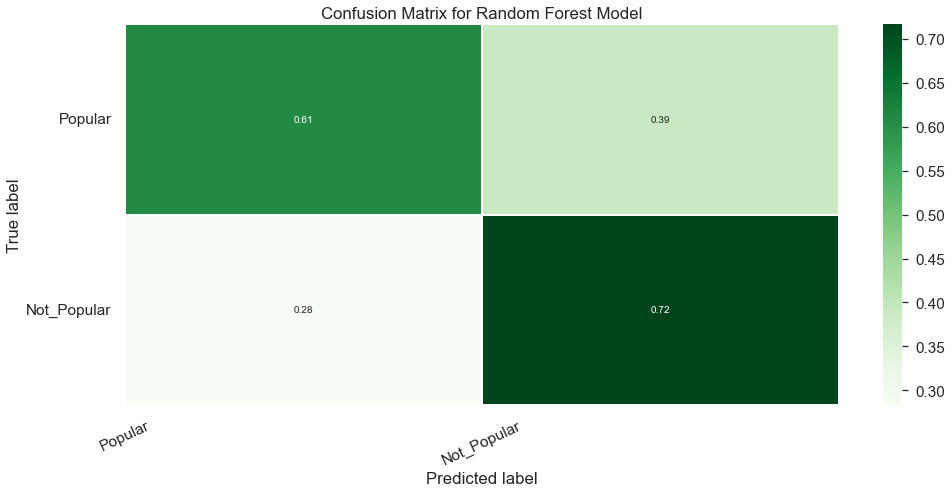

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Popular', 'Not_Popular']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### RFE + RF with 10 steps and 10 features

In [ ]:
df_news['TARGET'] = np.where( df_news.shares >= 1400, 1, 0)
# convert target feature to categorical 

first_column = df_news.pop('TARGET')
  
# insert column using insert(position,column_name,first_column) function
df_news.insert(0, 'TARGET', first_column)
df_news.head()

TARGET                                                url  timedelta  \
0       0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1       0  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2       1  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3       0  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       0   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385        4.0             2.0  ...   
1                  0.791946        3.0             1.0  ...   
2                  0.663866        3.0             1.0  ...   
3                  0.665635        9.0             0.0  ...   
4                  0.540890       19.0            19.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 62 columns]

In [ ]:
df_news_new = df_news.drop(['url', 'timedelta', 'shares'], axis = 1)
df_news_new.head()

TARGET  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0            12.0             219.0         0.663594   
1       0             9.0             255.0         0.604743   
2       1             9.0             211.0         0.575130   
3       0             9.0             531.0         0.503788   
4       0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_news_new.drop(columns=['TARGET']), df_news_new['TARGET'],test_size=0.3, random_state=0)

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
acc_test = accuracy_score(y_test, rf.predict(X_test))

In [ ]:
print(dict(zip(df_news_new.columns, rf.feature_importances_.round(2))))

{'TARGET': 0.02, 'n_tokens_title': 0.03, 'n_tokens_content': 0.03, 'n_unique_tokens': 0.0, 'n_non_stop_words': 0.03, 'n_non_stop_unique_tokens': 0.02, 'num_hrefs': 0.01, 'num_self_hrefs': 0.01, 'num_imgs': 0.01, 'num_videos': 0.03, 'average_token_length': 0.01, 'num_keywords': 0.0, 'data_channel_is_lifestyle': 0.01, 'data_channel_is_entertainment': 0.0, 'data_channel_is_bus': 0.01, 'data_channel_is_socmed': 0.01, 'data_channel_is_tech': 0.01, 'data_channel_is_world': 0.01, 'kw_min_min': 0.03, 'kw_max_min': 0.03, 'kw_avg_min': 0.02, 'kw_min_max': 0.01, 'kw_max_max': 0.03, 'kw_avg_max': 0.02, 'kw_min_avg': 0.04, 'kw_max_avg': 0.04, 'kw_avg_avg': 0.03, 'self_reference_min_shares': 0.02, 'self_reference_max_shares': 0.03, 'self_reference_avg_sharess': 0.0, 'weekday_is_monday': 0.0, 'weekday_is_tuesday': 0.0, 'weekday_is_wednesday': 0.0, 'weekday_is_thursday': 0.0, 'weekday_is_friday': 0.0, 'weekday_is_saturday': 0.0, 'weekday_is_sunday': 0.01, 'is_weekend': 0.03, 'LDA_00': 0.03, 'LDA_01': 

In [ ]:
print("{0:.1%} accuracy on test set.".format(acc))

65.7% accuracy on test set.


In [ ]:
rfe_1 = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=10, verbose=1)
rfe.fit(X_train, y_train)
mask = rfe.support_
reduced_data = df_news_new.drop(columns=['TARGET']).loc[:, mask]
print(reduced_data.columns)

Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.
Fitting estimator with 18 features.
Index(['n_non_stop_unique_tokens', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'kw_avg_avg', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_04',
       'global_subjectivity'],
      dtype='object')


In [ ]:
# Make predictions for the test set
y_pred_test = rfe.predict(X_test)

In [ ]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.6335967714814192

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59      5585
           1       0.64      0.70      0.67      6309

    accuracy                           0.63     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.63      0.63     11894



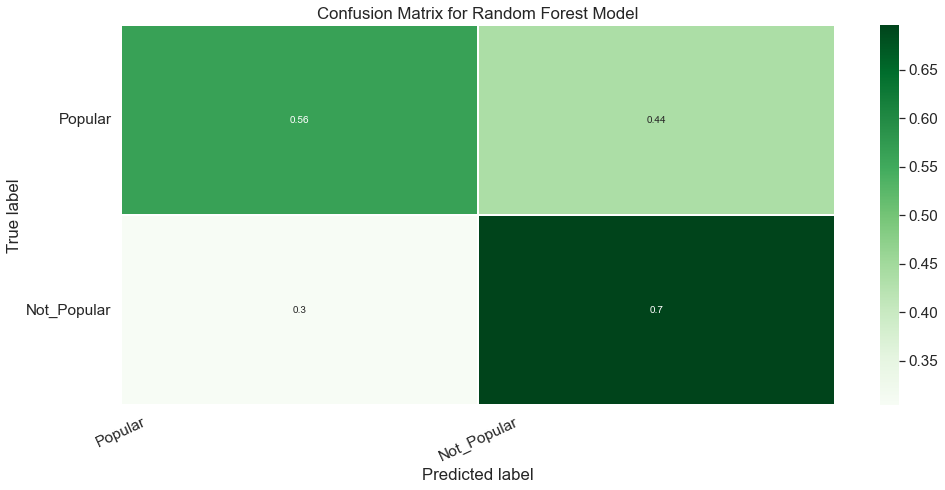

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Popular', 'Not_Popular']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
df_news['TARGET'].value_counts(normalize=True)

1    0.533599
0    0.466401
Name: TARGET, dtype: float64

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=8, step=10, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y2_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_df = df_rf2.drop(columns=['Is_Popular']).loc[:, mask]
print(reduced_df.columns)

### Pycaret for modeling

In [ ]:
df_news['TARGET'] = np.where( df_news.shares >= 1400, 1, 0)
# convert target feature to categorical 

first_column = df_news.pop('TARGET')
  
# insert column using insert(position,column_name,first_column) function
df_news.insert(0, 'TARGET', first_column)
df_news.head()

TARGET                                                url  timedelta  \
0       0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1       0  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2       1  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3       0  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       0   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385        4.0             2.0  ...   
1                  0.791946        3.0             1.0  ...   
2                  0.663866        3.0             1.0  ...   
3                  0.665635        9.0             0.0  ...   
4                  0.540890       19.0            19.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 62 columns]

In [ ]:
df_news_new = df_news.drop(['url', 'timedelta', 'shares'], axis = 1)
df_news_new.head()

TARGET  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0            12.0             219.0         0.663594   
1       0             9.0             255.0         0.604743   
2       1             9.0             211.0         0.575130   
3       0             9.0             531.0         0.503788   
4       0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

## TRAIN-TEST-VALIDATION SPLIT

In [ ]:
data = df_news_new.sample(frac=0.9, random_state=786)
data_unseen = df_news_new.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (35680, 59)
Unseen Data For Predictions: (3964, 59)


In [ ]:
from pycaret.classification import *

## SETUP 

In [ ]:
model_final1 = setup(data = data, target = 'TARGET', session_id=888, remove_multicollinearity = True, feature_selection = True, feature_selection_threshold = 0.1,normalize = True, data_split_stratify = True)

### SETUP after doubling the feature_threshold does not lead to a significant increase in Accuracy. So, we will continue with model_final1

In [ ]:
best_model_1=compare_models(sort = 'F1')

## MODEL CREATION

In [ ]:
# create Gradient Boosting Classifier model
gbc = create_model('gbc')

In [ ]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=888, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
# create Light Gradient Boosting Machine model
lgbm = create_model('lightgbm')

In [ ]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=888, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# create Random Forest Classifier model
rf = create_model('rf')

In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=888, verbose=0,
                       warm_start=False)


## MODEL TUNING

In [ ]:
df_news['TARGET'] = np.where( df_news.shares >= 1400, 1, 0)
# convert target feature to categorical 

first_column = df_news.pop('TARGET')
  
# insert column using insert(position,column_name,first_column) function
df_news.insert(0, 'TARGET', first_column)
df_news.head()

TARGET                                                url  timedelta  \
0       0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1       0  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2       1  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3       0  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       0   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385        4.0             2.0  ...   
1                  0.791946        3.0             1.0  ...   
2                  0.663866        3.0             1.0  ...   
3                  0.665635        9.0             0.0  ...   
4                  0.540890       19.0            19.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 62 columns]

In [ ]:
df_news_new = df_news.drop(['url', 'timedelta', 'shares'], axis = 1)
df_news_new.head()

TARGET  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0            12.0             219.0         0.663594   
1       0             9.0             255.0         0.604743   
2       1             9.0             211.0         0.575130   
3       0             9.0             531.0         0.503788   
4       0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

In [ ]:
data = df_news_new.sample(frac=0.9, random_state=786)
data_unseen = df_news_new.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (35680, 59)
Unseen Data For Predictions: (3964, 59)


In [ ]:
from pycaret.classification import *

In [ ]:
model_final2 = setup(data = data, target = 'TARGET', session_id=666, remove_multicollinearity = True, feature_selection = True, feature_selection_threshold = 0.2,normalize = True, data_split_stratify = True)

In [ ]:
best_model_2=compare_models(sort = 'F1')

In [ ]:
tuned_gbc = tune_model(gbc)

In [ ]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=8,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.1, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=888, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
tuned_lgbm = tune_model(lgbm)

In [ ]:
print(tuned_lgbm)

LGBMClassifier(bagging_fraction=0.5, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=61, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=30, n_jobs=-1, num_leaves=200, objective=None,
               random_state=888, reg_alpha=1e-06, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
tuned_rf = tune_model(rf)

## Precision-Recall Curve

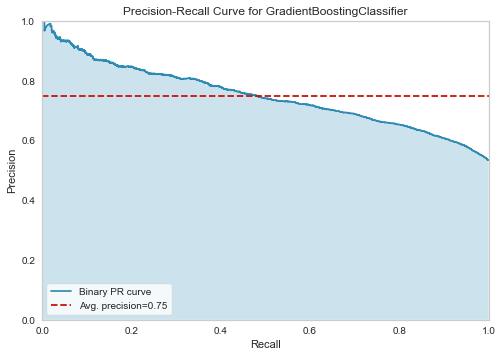

In [ ]:
plot_model(tuned_gbc, plot = 'pr')

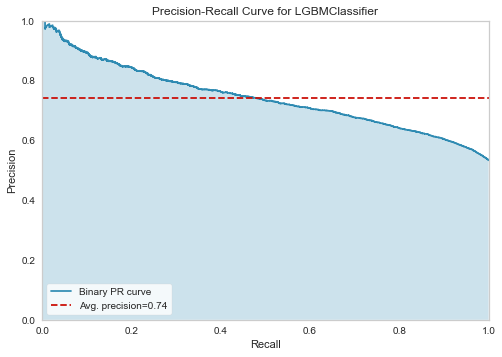

In [ ]:
plot_model(tuned_lgbm, plot = 'pr')

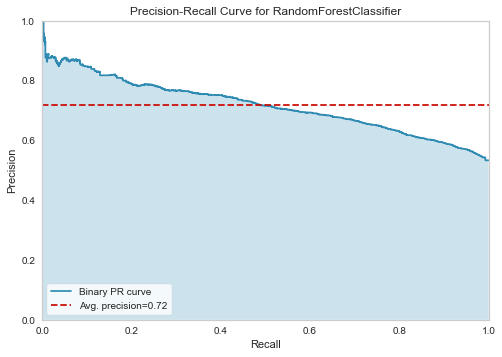

In [ ]:
plot_model(tuned_rf, plot = 'pr')

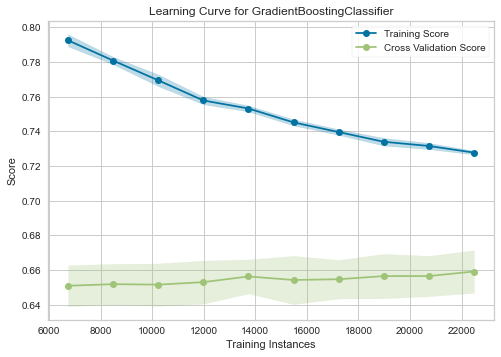

In [ ]:
plot_model(tuned_gbc, plot = 'learning')

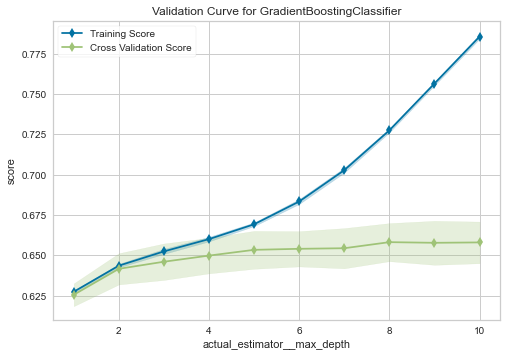

In [ ]:
plot_model(tuned_gbc, plot = 'vc')

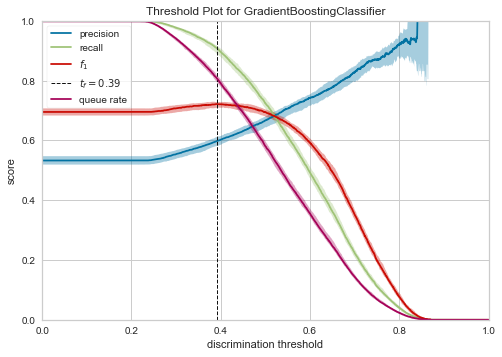

In [ ]:
plot_model(tuned_gbc, plot = 'threshold')

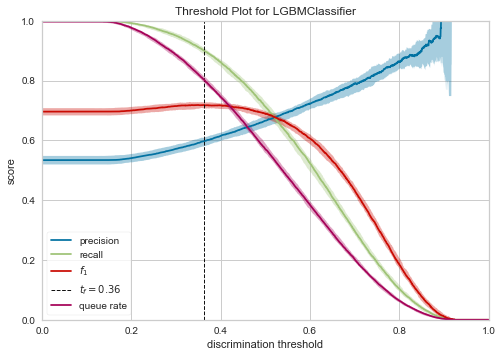

In [ ]:
plot_model(tuned_lgbm, plot = 'threshold')

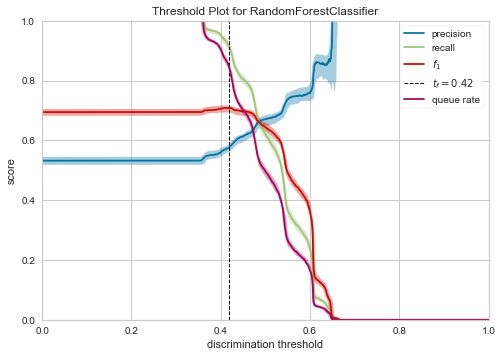

In [ ]:
plot_model(tuned_rf, plot = 'threshold')

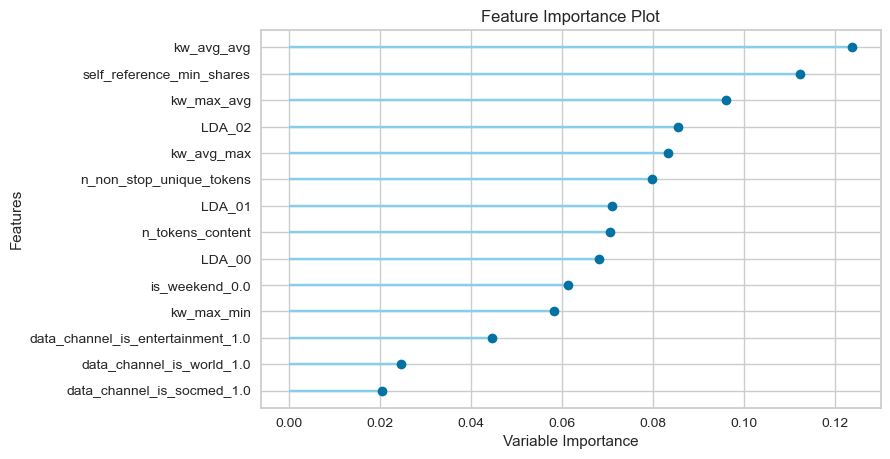

In [ ]:
plot_model(tuned_gbc, plot = 'feature_all')
# Feature importance for tuned_gbc model

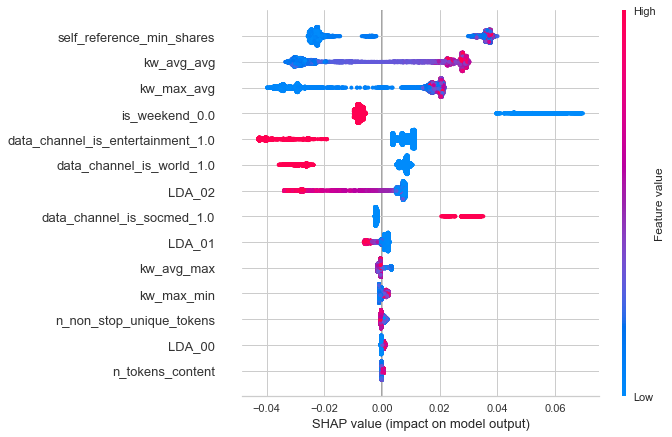

In [ ]:
!pip install shap
interpret_model(tuned_rf)
# impact of features on output of tuned_rf model

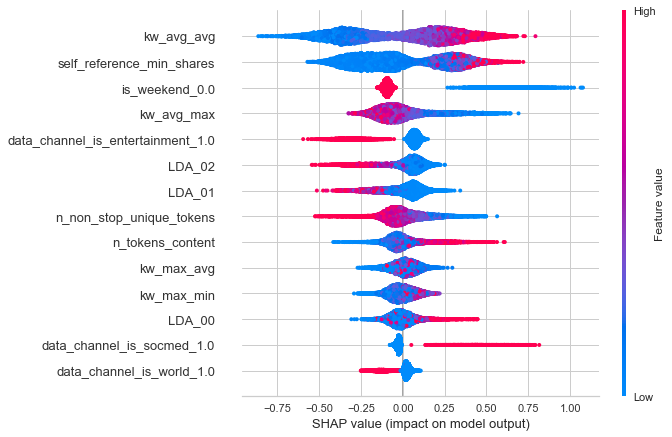

In [ ]:
interpret_model(tuned_lgbm)
# impact of features on output of tuned_lgbm model

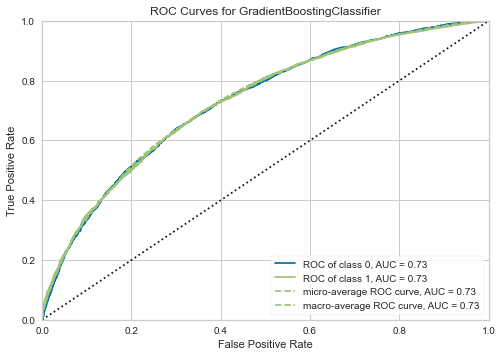

In [ ]:
plot_model(tuned_gbc, plot = 'auc')

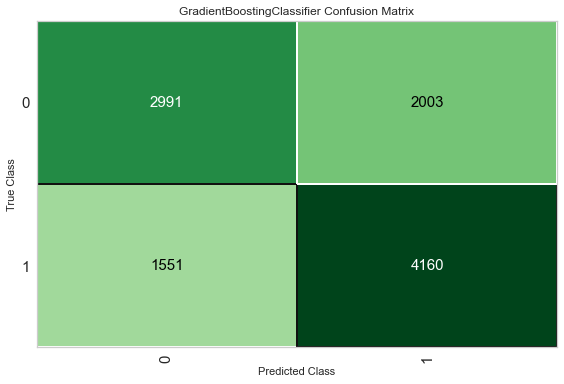

In [ ]:
plot_model(tuned_gbc, plot = 'confusion_matrix')
# Confusion matrix for tuned_gbc model

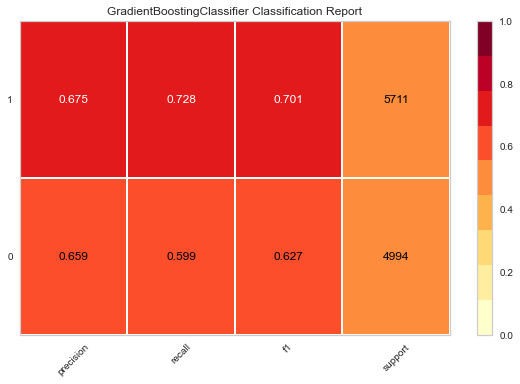

In [ ]:
plot_model(tuned_gbc, plot = 'class_report')
#Classification report for tuned_gbc model

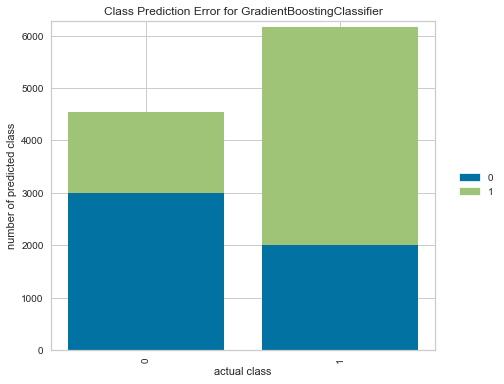

In [ ]:
plot_model(tuned_gbc, plot = 'error')

## LET US TRY BLENDING THE TOP 3 MODELS

In [ ]:
blend_specific_soft = blend_models(estimator_list = [tuned_gbc,tuned_lgbm, tuned_rf], method = 'soft')

### Since the accuracy drops slightly, we will finalze model using tuned Gradient Boosting Classifier

## PREDICTION ON TEST DATA

In [ ]:
predict_model(tuned_gbc);
# Use tuned_gbc model

In [ ]:
final_gbc = finalize_model(tuned_gbc)
# Finalizing our model

In [ ]:
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=8,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.1, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=888, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## PREDICTION ON UNSEEN DATA

In [ ]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

TARGET  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0            10.0             370.0         0.559889   
1       0             9.0             274.0         0.609195   
2       0             8.0             259.0         0.562753   
3       0             9.0             944.0         0.433012   
4       1             9.0            1115.0         0.424132   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.698198        2.0             2.0   
1               1.0                  0.707602       18.0             2.0   
2               1.0                  0.644444       19.0             3.0   
3               1.0                  0.565789       21.0            21.0   
4               1.0                  0.564539       21.0            21.0   

   num_imgs  num_videos  ...  max_positive_polarity  avg_negative_polarity  \
0       0.0         0.0  ...                    0.6              -0.195000   
1      11.0         0.0  ...                    0.7              -0.310417   
2       9.0         0.0  ...                    0.5              -0.138690   
3      20.0         0.0  ...                    1.0              -0.204902   
4      20.0         0.0  ...                    1.0              -0.212354   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                -0.4000                  -0.10            0.642857   
1                -0.6000                  -0.05            1.000000   
2                -0.1875                  -0.05            0.750000   
3                -0.5000                  -0.05            0.642857   
4                -0.5000                  -0.05            0.333333   

   title_sentiment_polarity  abs_title_subjectivity  \
0                  0.214286                0.142857   
1                 -1.000000                0.500000   
2                  0.550000                0.250000   
3                  0.214286                0.142857   
4                  0.250000                0.166667   

   abs_title_sentiment_polarity  Label   Score  
0                      0.214286      1  0.6063  
1                      1.000000      1  0.6490  
2                      0.550000      1  0.5991  
3                      0.214286      0  0.6022  
4                      0.250000      0  0.5979  

[5 rows x 61 columns]

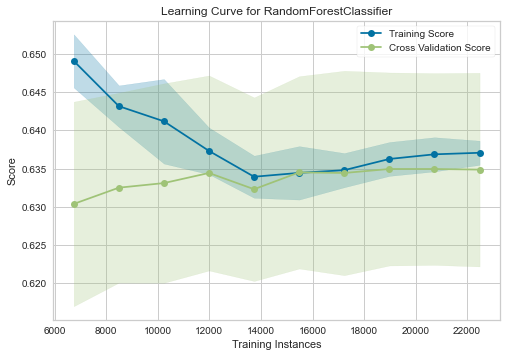

In [ ]:
plot_model(tuned_rf, plot = 'learning')

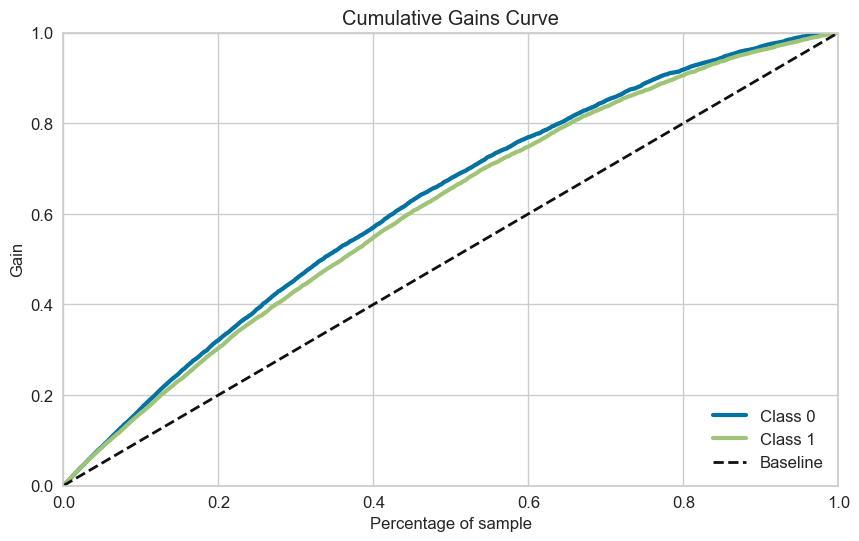

In [ ]:
plot_model(tuned_gbc, plot = 'gain')

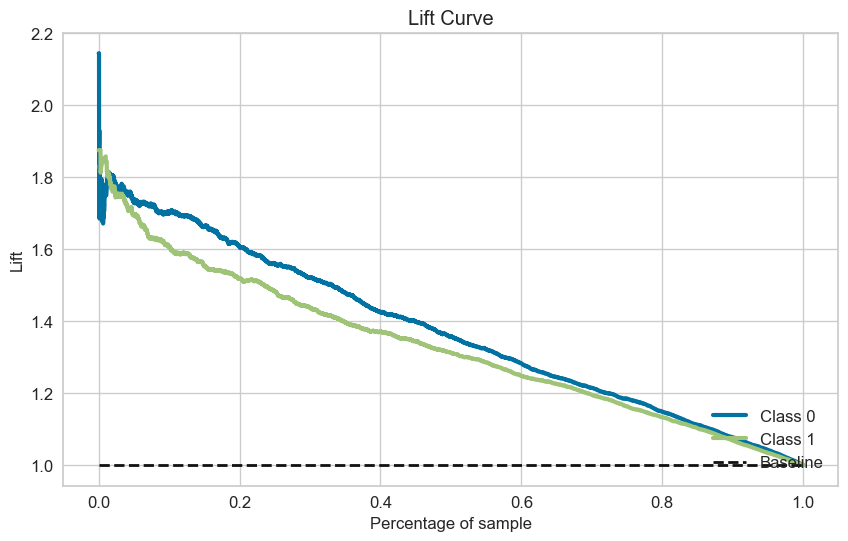

In [ ]:
plot_model(tuned_gbc, plot = 'lift')

### Increasing feature threshold

In [ ]:
df_news['TARGET'] = np.where( df_news.shares >= 1400, 1, 0)
# convert target feature to categorical 

first_column = df_news.pop('TARGET')
  
# insert column using insert(position,column_name,first_column) function
df_news.insert(0, 'TARGET', first_column)
df_news.head()

TARGET                                                url  timedelta  \
0       0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1       0  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2       1  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3       0  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       0   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.815385        4.0             2.0  ...   
1                  0.791946        3.0             1.0  ...   
2                  0.663866        3.0             1.0  ...   
3                  0.665635        9.0             0.0  ...   
4                  0.540890       19.0            19.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 62 columns]

In [ ]:
df_news_new = df_news.drop(['url', 'timedelta', 'shares'], axis = 1)
df_news_new.head()

TARGET  n_tokens_title  n_tokens_content  n_unique_tokens  \
0       0            12.0             219.0         0.663594   
1       0             9.0             255.0         0.604743   
2       1             9.0             211.0         0.575130   
3       0             9.0             531.0         0.503788   
4       0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

In [ ]:
data = df_news_new.sample(frac=0.9, random_state=786)
data_unseen = df_news_new.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (35680, 59)
Unseen Data For Predictions: (3964, 59)


In [ ]:
from pycaret.classification import *

In [ ]:
model_final2 = setup(data = data, target = 'TARGET', session_id=666, remove_multicollinearity = True, feature_selection = True, feature_selection_threshold = 0.2,normalize = True, data_split_stratify = True)

In [ ]:
best_model_2=compare_models(sort = 'F1')

By doubling the feature threshold, there's a marginal increase in accuracy.
Hence we continued with model_1

## **4. CONCLUSION:**

● Models are robust to overfitting (Random Forest and Gradient Boosting Classifiers) and
underfitting (Logistic Regression) thereby handling the bias-variance tradeoff

● The best model is Gradient Boosting Classifier because of a good overall F1 score which is a
good measure of the precision-recall tradeoff.

● We observed that all three models have several common attributes and have the following significant predictors. 
  
They are:

  ○ Keywords (especially kw_avg_avg)

  ○ Posting stories on the weekend (specifically Saturday in Logistic)

  ○ Data channel is Entertainment, Data channel is Socmed (Social Media) and Data channel is World

● From this we can conclude that these variables have the highest impact on predicting
shares, especially keywords, as there are three variables related to it in the top five feature
importance of Gradient Boosting Classifier model

## **5. Bibliography**



*   Andrew Ng’s videos from CS229 (Stanford). Freely available on YouTube
*   How to describe a dataset by [Anil Doshi](https://www.scribd.com/document/495644797/How-to-Describe-a-Data-Set#)
* The Elements of Statistical Learnings. Trevor Hastie, Robert Tibshirani, Jerome Friedman. *Chapter 7 Model assessment and selection (pages 219 to 257)*

